<a href="https://colab.research.google.com/github/illliyas/Machine-Learning/blob/master/ekAssessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Prediction of German Loan Application

### Importing all necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import pytz
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
import re

### Reading the data

In [3]:
df = pd.read_csv('loan_data_track1.csv')

In [4]:
df.head()

,checking_status,duration,loan_history,purpose,loan_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_loans,job,num_dependents,own_telephone,foreign_worker,accepted
0,<0DM,6,Critical_acct_other_loans_existing,radio/television,1169,Unknown_or_no_savings_acct,>7yrs,4,male_single,None,4,real_estate,67,none,own,m22,skilled_employee/official,1,Yes,yes,2
1,0_to_200DM,48,Existing_loans_paid_till_now,radio/television,5951,<100DM,1_to_4yrs,2,female_divorced/separated/married,None,2,real_estate,22,none,own,e1,skilled_employee/official,1,No,yes,1
2,None,12,Critical_acct_other_loans_existing,education,2096,<100DM,4_to_7yrs,2,male_single,None,3,real_estate,49,none,own,1,unskilled_resident,2,No,yes,2
3,<0DM,42,Existing_loans_paid_till_now,furniture/equipment,7882,<100DM,4_to_7yrs,2,male_single,guarantor,4,building_society_savings_agreement/life_insurance,45,none,for_free,q1,skilled_employee/official,2,No,yes,2
4,<0DM,24,Delay_in_past,new_car,4870,<100DM,1_to_4yrs,3,male_single,None,4,unknown/no_property,53,none,for_free,p22,skilled_employee/official,2,No,yes,1


### Missing Data Check

#### Verify the percentage of null values in each column

In [5]:
(df.isnull().sum()/len(df))*100

checking_status           0.0
duration                  0.0
loan_history              0.0
purpose                   0.0
loan_amount               0.0
savings_status            0.0
employment                0.0
installment_commitment    0.0
personal_status           0.0
other_parties             0.0
residence_since           0.0
property_magnitude        0.0
age                       0.0
other_payment_plans       0.0
housing                   0.0
existing_loans            0.0
job                       0.0
num_dependents            0.0
own_telephone             0.0
foreign_worker            0.0
accepted                  0.0
dtype: float64

No missing data identified

#### Altering the Accepetd variable to represent 0 as Rejected and 1 as Accepted

In [6]:
df['accepted'] = df['accepted'].apply(lambda x: 'Rejected' if x==1 else 'Accepted')

### Data Exploration

In [7]:
df.head()

,checking_status,duration,loan_history,purpose,loan_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_loans,job,num_dependents,own_telephone,foreign_worker,accepted
0,<0DM,6,Critical_acct_other_loans_existing,radio/television,1169,Unknown_or_no_savings_acct,>7yrs,4,male_single,None,4,real_estate,67,none,own,m22,skilled_employee/official,1,Yes,yes,Accepted
1,0_to_200DM,48,Existing_loans_paid_till_now,radio/television,5951,<100DM,1_to_4yrs,2,female_divorced/separated/married,None,2,real_estate,22,none,own,e1,skilled_employee/official,1,No,yes,Rejected
2,None,12,Critical_acct_other_loans_existing,education,2096,<100DM,4_to_7yrs,2,male_single,None,3,real_estate,49,none,own,1,unskilled_resident,2,No,yes,Accepted
3,<0DM,42,Existing_loans_paid_till_now,furniture/equipment,7882,<100DM,4_to_7yrs,2,male_single,guarantor,4,building_society_savings_agreement/life_insurance,45,none,for_free,q1,skilled_employee/official,2,No,yes,Accepted
4,<0DM,24,Delay_in_past,new_car,4870,<100DM,1_to_4yrs,3,male_single,None,4,unknown/no_property,53,none,for_free,p22,skilled_employee/official,2,No,yes,Rejected


#### Extracting Gender and marital_status  from personal_status

In [8]:
df['personal_status'].unique()

array(['male_single', 'female_divorced/separated/married',
       'male_divorced/separated', 'male_married/widowed'], dtype=object)

In [9]:
df['gender'] = df['personal_status'].apply(lambda x: x.split('_')[0])

In [10]:
df['gender']

0        male
1      female
2        male
3        male
4        male
        ...  
995    female
996      male
997      male
998      male
999      male
Name: gender, Length: 1000, dtype: object

In [11]:
df['marital_status'] = df['personal_status'].apply(lambda x: x.split('_')[1])

In [12]:
df['marital_status']

0                          single
1      divorced/separated/married
2                          single
3                          single
4                          single
                  ...            
995    divorced/separated/married
996            divorced/separated
997                        single
998                        single
999                        single
Name: marital_status, Length: 1000, dtype: object

#### Cleaning  existing_loans lowercase alphabet characters and extracting only numeric

In [13]:
df['existing_loans'] = df['existing_loans'].apply(lambda x: re.findall(r'\d+', x)[0])

In [14]:
df['existing_loans']

0      22
1       1
2       1
3       1
4      22
       ..
995     1
996     1
997     1
998     1
999     1
Name: existing_loans, Length: 1000, dtype: object

### 3. Univariate Plots & analysis 

In [15]:
sns.set_style("darkgrid")

#### Analysing the Target variable "accepted"

In [16]:
sns.set()

In [17]:
accepted_rate = df['accepted'].value_counts(normalize=True)

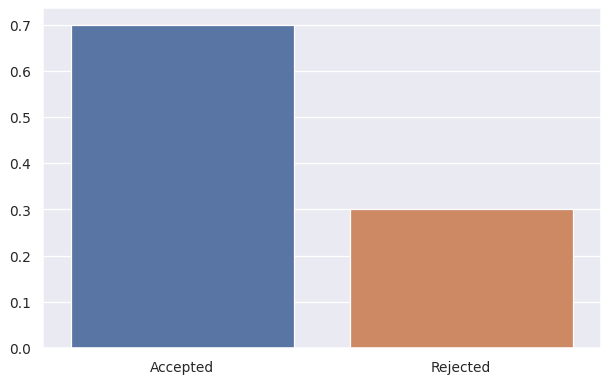

In [18]:
f, ax = plt.subplots(figsize=(8,5), dpi=90)
sns.barplot(x=accepted_rate.index, y=accepted_rate.values, ax=ax)

70% Loans are accepted and 30% are Rejected. This is a class-imbalance dataset.

## 3.a Univariate Analysis of driving factors/ influencers

In [19]:
def setLabels(plot, xLabel, yLabel, title):
    plt.ylabel(yLabel, fontsize=18)
    plt.xlabel(xLabel, fontsize=18)
    plt.setp(plot.get_xticklabels(), fontsize=14)
    plt.setp(plot.get_yticklabels(), fontsize=14)
    plot.set_title(title, fontsize=20)

In [20]:
def createCountPlot(varName, xLabel, yLabel, title):
    count_plot = sns.countplot(varName, hue='accepted',data=df)
    setLabels(count_plot, xLabel, yLabel, title)

In [21]:
def createPercPlot(varName, xLabel, yLabel, title):
    charge_off_rates = df.groupby(varName)['accepted'].value_counts(normalize=True).loc[:,'Rejected']
    perc_plot = sns.barplot(x=charge_off_rates.reset_index()[varName], y=charge_off_rates.values)
    setLabels(perc_plot, xLabel, yLabel, title)

In [22]:
def createBarPlot(varName, xLabel, yLabel, title):
    bar_plot = sns.barplot(y=varName, x='accepted',data=loan)
    setLabels(bar_plot, xLabel, yLabel, title)

In [23]:
def createDistPlot(varName, xLabel, yLabel, title):
    dist_plot = sns.distplot(df[varName])
    setLabels(dist_plot, xLabel, yLabel, title)
    
def createBoxPlot(varName, xLabel, yLabel, title):
    box_plot = sns.boxplot(x=varName,y='accepted',data=df)
    setLabels(box_plot, xLabel, yLabel, title)

### Continuous variable Analysis

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

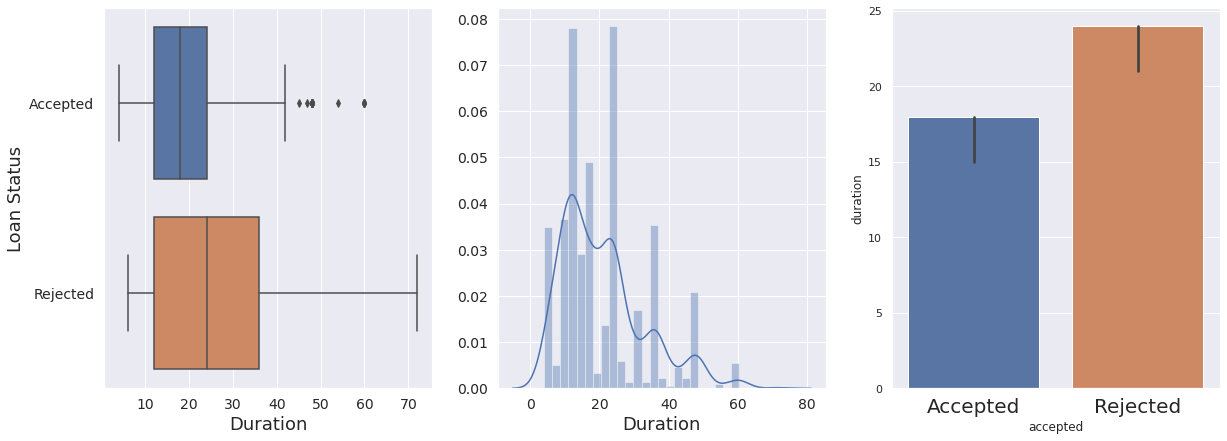

In [24]:
plt.figure(figsize=[20,7])
plt.subplot(1,3,1)
createBoxPlot('duration', 'Duration', 'Loan Status', '')

plt.subplot(1,3,2)
createDistPlot('duration', 'Duration', '', '')

plt.subplot(1, 3, 3)
sns.barplot(x='accepted', y='duration', data=df, estimator=np.median)
plt.xticks(fontsize=20)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

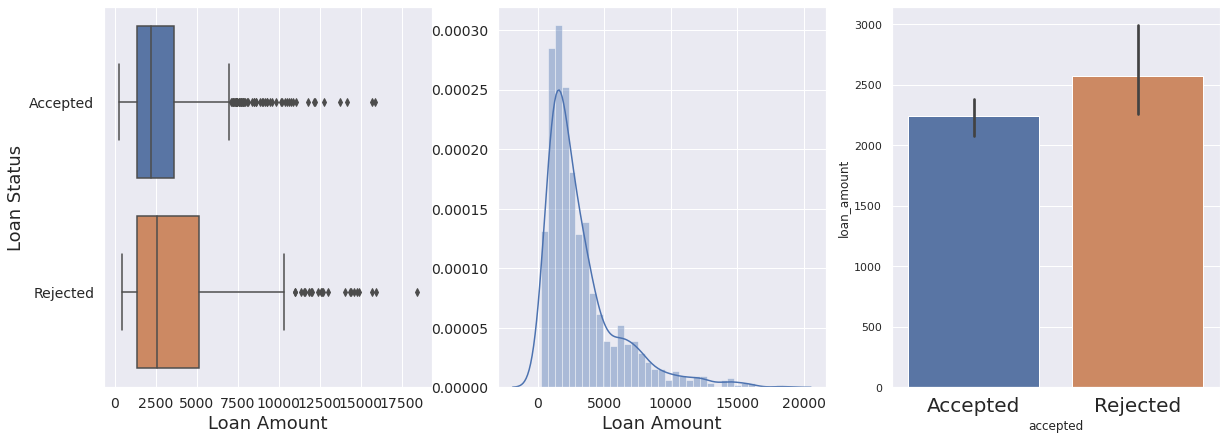

In [25]:
plt.figure(figsize=[20,7])
plt.subplot(1,3,1)
createBoxPlot('loan_amount', 'Loan Amount', 'Loan Status', '')

plt.subplot(1,3,2)
createDistPlot('loan_amount', 'Loan Amount', '', '')

plt.subplot(1, 3, 3)
sns.barplot(x='accepted', y='loan_amount', data=df, estimator=np.median)
plt.xticks(fontsize=20)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

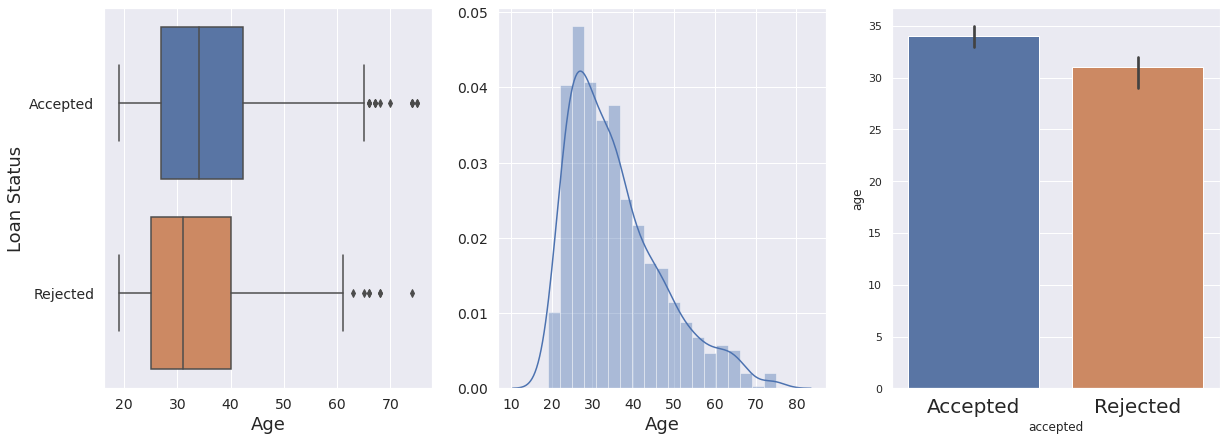

In [26]:
plt.figure(figsize=[20,7])
plt.subplot(1,3,1)
createBoxPlot('age', 'Age', 'Loan Status', '')
    
plt.subplot(1,3,2)
createDistPlot('age', 'Age', '', '')

plt.subplot(1, 3, 3)
sns.barplot(x='accepted', y='age', data=df, estimator=np.median)
plt.xticks(fontsize=20)

In [27]:
df['loan_amount'].describe(percentiles=[.95,.97])

count     1000.000000
mean      3271.258000
std       2822.736876
min        250.000000
50%       2319.500000
95%       9162.700000
97%      10961.390000
max      18424.000000
Name: loan_amount, dtype: float64

### Univariate Analysis

In [28]:
df

,checking_status,duration,loan_history,purpose,loan_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_loans,job,num_dependents,own_telephone,foreign_worker,accepted,gender,marital_status
0,<0DM,6,Critical_acct_other_loans_existing,radio/television,1169,Unknown_or_no_savings_acct,>7yrs,4,male_single,None,4,real_estate,67,none,own,22,skilled_employee/official,1,Yes,yes,Accepted,male,single
1,0_to_200DM,48,Existing_loans_paid_till_now,radio/television,5951,<100DM,1_to_4yrs,2,female_divorced/separated/married,None,2,real_estate,22,none,own,1,skilled_employee/official,1,No,yes,Rejected,female,divorced/separated/married
2,None,12,Critical_acct_other_loans_existing,education,2096,<100DM,4_to_7yrs,2,male_single,None,3,real_estate,49,none,own,1,unskilled_resident,2,No,yes,Accepted,male,single
3,<0DM,42,Existing_loans_paid_till_now,furniture/equipment,7882,<100DM,4_to_7yrs,2,male_single,guarantor,4,building_society_savings_agreement/life_insurance,45,none,for_free,1,skilled_employee/official,2,No,yes,Accepted,male,single
4,<0DM,24,Delay_in_past,new_car,4870,<100DM,1_to_4yrs,3,male_single,None,4,unknown/no_property,53,none,for_free,22,skilled_employee/official,2,No,yes,Rejected,male,single
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,None,12,Existing_loans_paid_till_now,furniture/equipment,1736,<100DM,4_to_7yrs,3,female_divorced/separated/married,None,4,real_estate,31,none,own,1,unskilled_resident,1,No,yes,Accepted,female,divorced/separated/married
996,<0DM,30,Existing_loans_paid_till_now,used_car,3857,<100DM,1_to_4yrs,4,male_divorced/separated,None,4,building_society_savings_agreement/life_insurance,40,none,own,1,management_self-employed_highly_qualified/officer,1,Yes,yes,Accepted,male,divorced/separated
997,None,12,Existing_loans_paid_till_now,radio/television,804,<100DM,>7yrs,4,male_single,None,4,car_or_other_nonsavings,38,none,own,1,skilled_employee/official,1,No,yes,Accepted,male,single
998,<0DM,45,Existing_loans_paid_till_now,radio/television,1845,<100DM,1_to_4yrs,4,male_single,None,4,unknown/no_property,23,none,for_free,1,skilled_employee/official,1,Yes,yes,Rejected,male,single


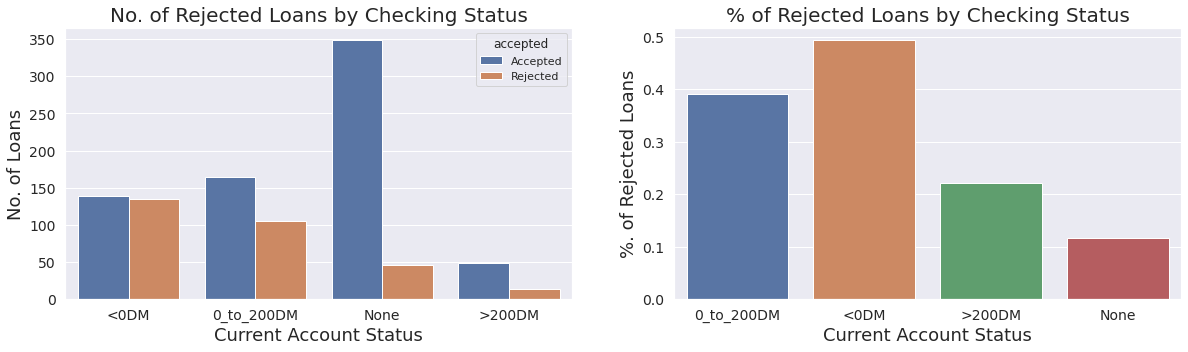

In [29]:
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
createCountPlot('checking_status', 'Current Account Status', 'No. of Loans', 'No. of Rejected Loans by Checking Status')

plt.subplot(1,2,2)
createPercPlot('checking_status', 'Current Account Status', '%. of Rejected Loans', '% of Rejected Loans by Checking Status')

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

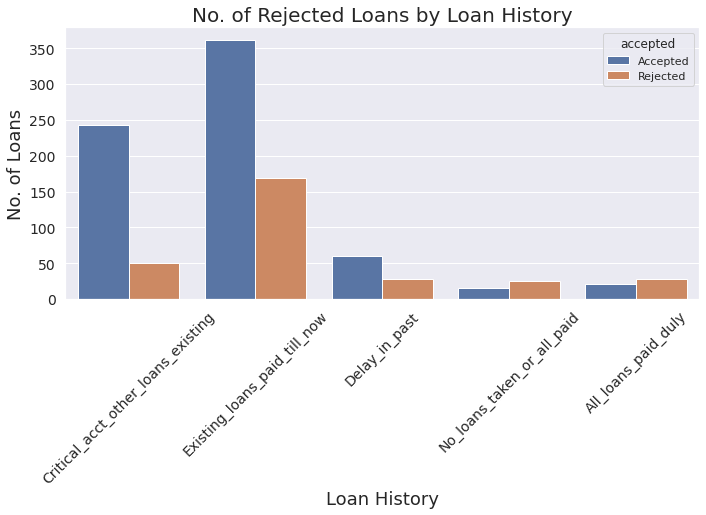

In [30]:
plt.figure(figsize=[25,5])
plt.subplot(1,2,1)
createCountPlot('loan_history', 'Loan History', 'No. of Loans', 'No. of Rejected Loans by Loan History')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

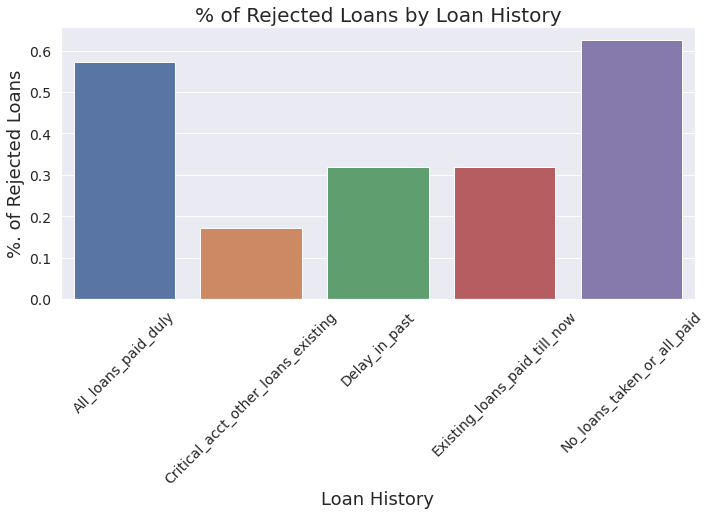

In [31]:
plt.figure(figsize=[25,5])
plt.subplot(1,2,2)
createPercPlot('loan_history', 'Loan History', '%. of Rejected Loans', '% of Rejected Loans by Loan History')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

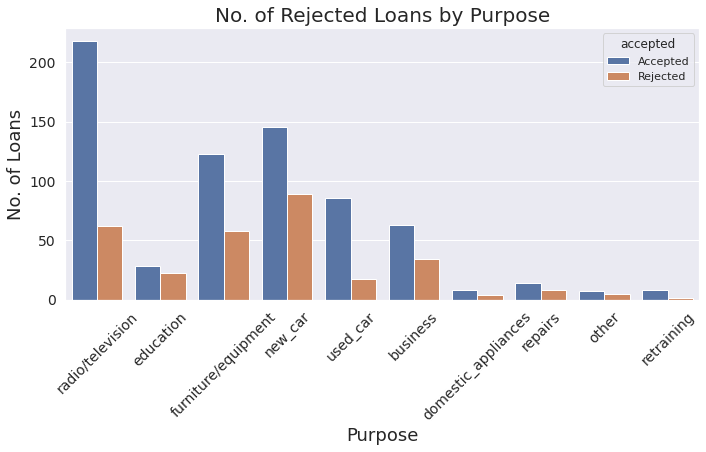

In [32]:
plt.figure(figsize=[25,5])
plt.subplot(1,2,1)
createCountPlot('purpose', 'Purpose', 'No. of Loans', 'No. of Rejected Loans by Purpose')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

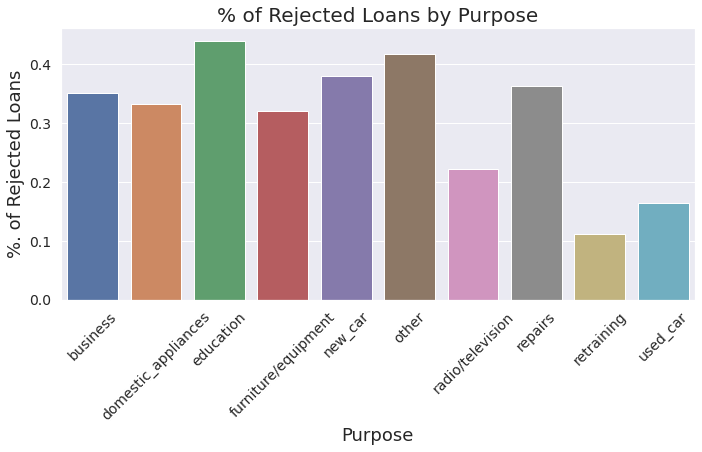

In [33]:
plt.figure(figsize=[25,5])
plt.subplot(1,2,2)
createPercPlot('purpose', 'Purpose', '%. of Rejected Loans', '% of Rejected Loans by Purpose')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

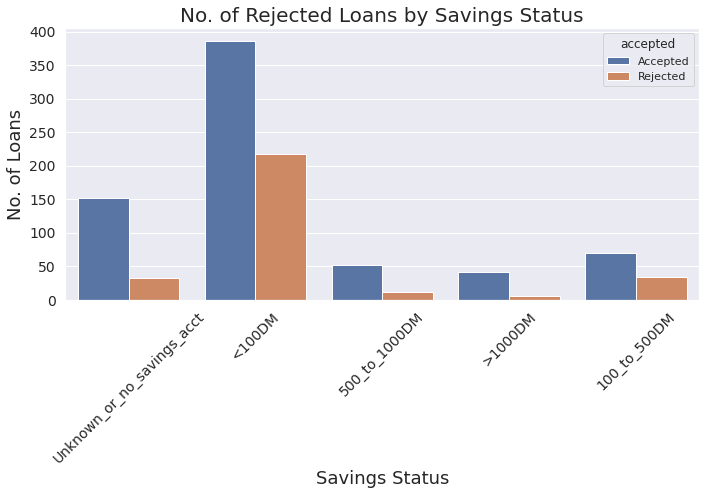

In [34]:
plt.figure(figsize=[25,5])
plt.subplot(1,2,1)
createCountPlot('savings_status', 'Savings Status', 'No. of Loans', 'No. of Rejected Loans by Savings Status')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

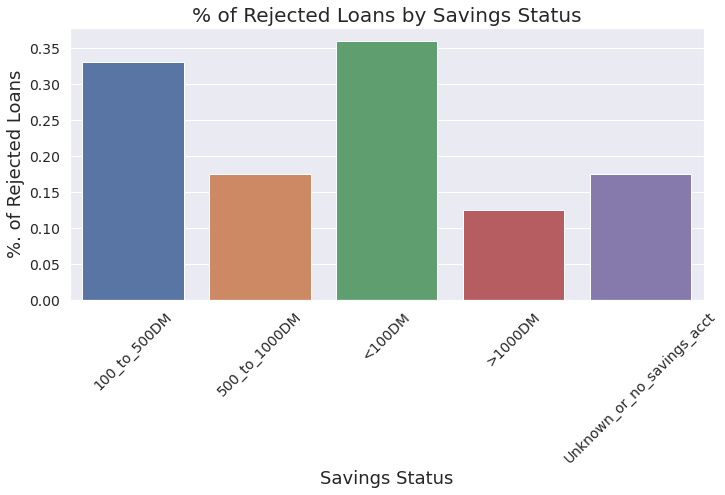

In [35]:
plt.figure(figsize=[25,5])
plt.subplot(1,2,2)
createPercPlot('savings_status', 'Savings Status', '%. of Rejected Loans', '% of Rejected Loans by Savings Status')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

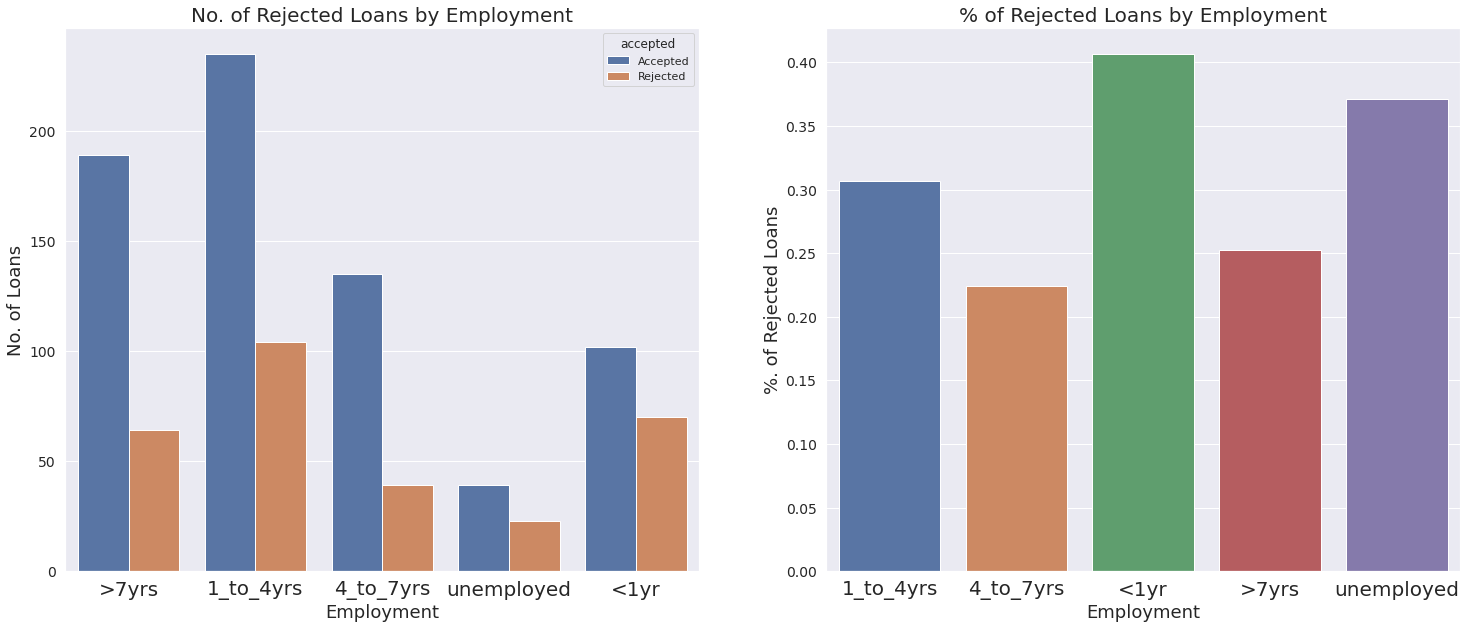

In [36]:
plt.figure(figsize=[25,10])
plt.subplot(1,2,1)
createCountPlot('employment', 'Employment', 'No. of Loans', 'No. of Rejected Loans by Employment')
plt.xticks(fontsize=20)

plt.subplot(1,2,2)
createPercPlot('employment', 'Employment', '%. of Rejected Loans', '% of Rejected Loans by Employment')
plt.xticks(fontsize=20)

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

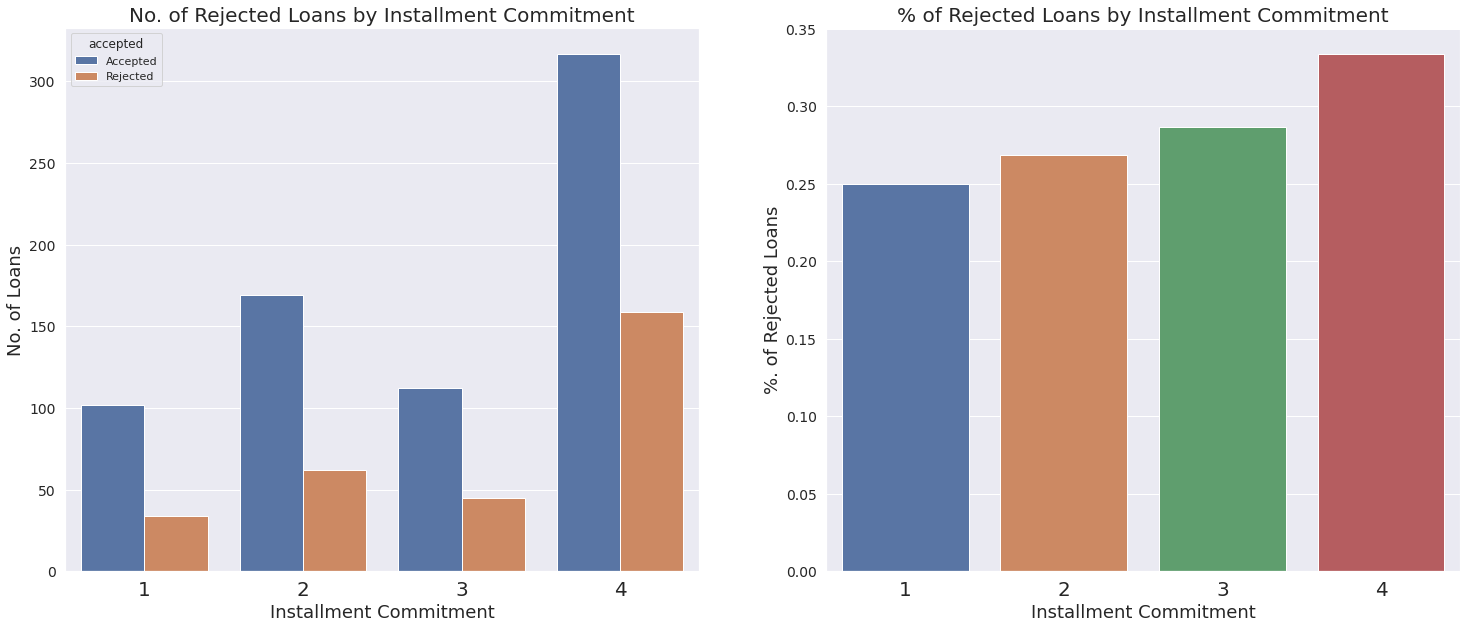

In [37]:
plt.figure(figsize=[25,10])
plt.subplot(1,2,1)
createCountPlot('installment_commitment', 'Installment Commitment', 'No. of Loans', 'No. of Rejected Loans by Installment Commitment')
plt.xticks(fontsize=20)

plt.subplot(1,2,2)
createPercPlot('installment_commitment', 'Installment Commitment', '%. of Rejected Loans', '% of Rejected Loans by Installment Commitment')
plt.xticks(fontsize=20)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

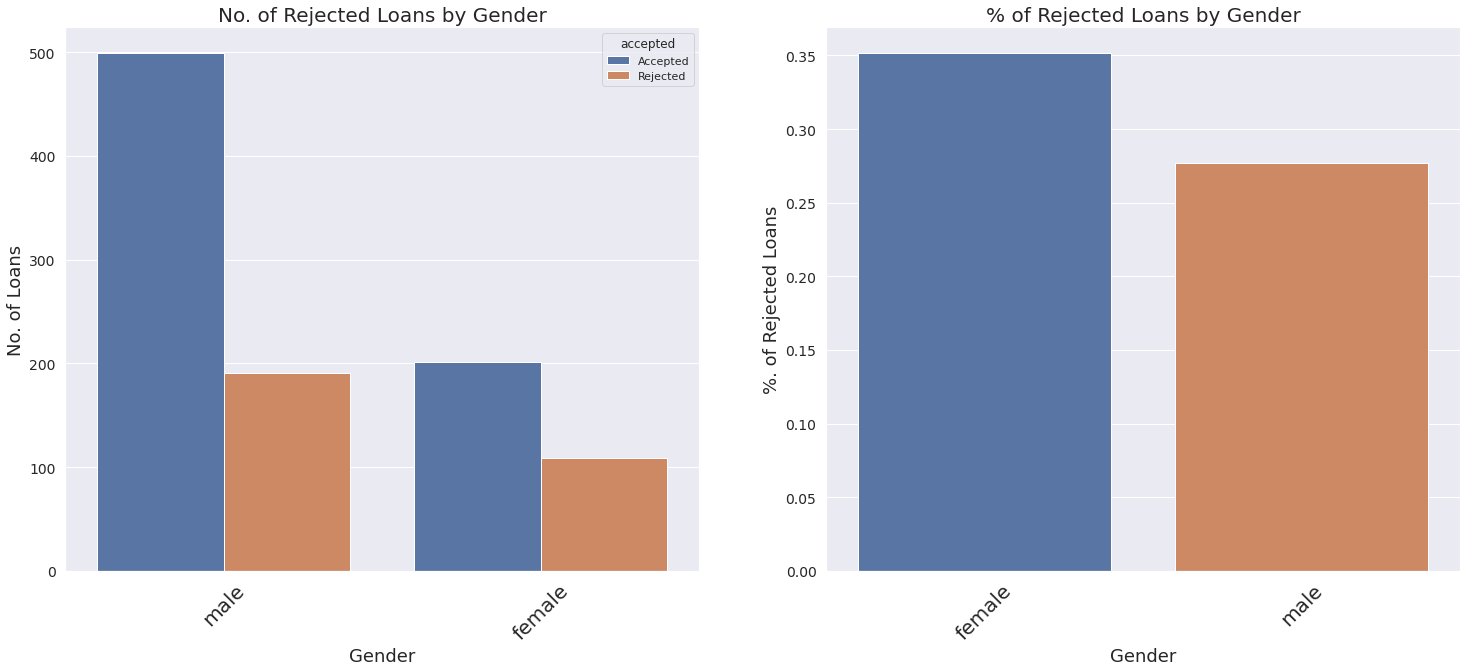

In [38]:
plt.figure(figsize=[25,10])
plt.subplot(1,2,1)
createCountPlot('gender', 'Gender', 'No. of Loans', 'No. of Rejected Loans by Gender')
plt.xticks(rotation=45, fontsize=20)

plt.subplot(1,2,2)
createPercPlot('gender', 'Gender', '%. of Rejected Loans', '% of Rejected Loans by Gender')
plt.xticks(rotation=45, fontsize=20)

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

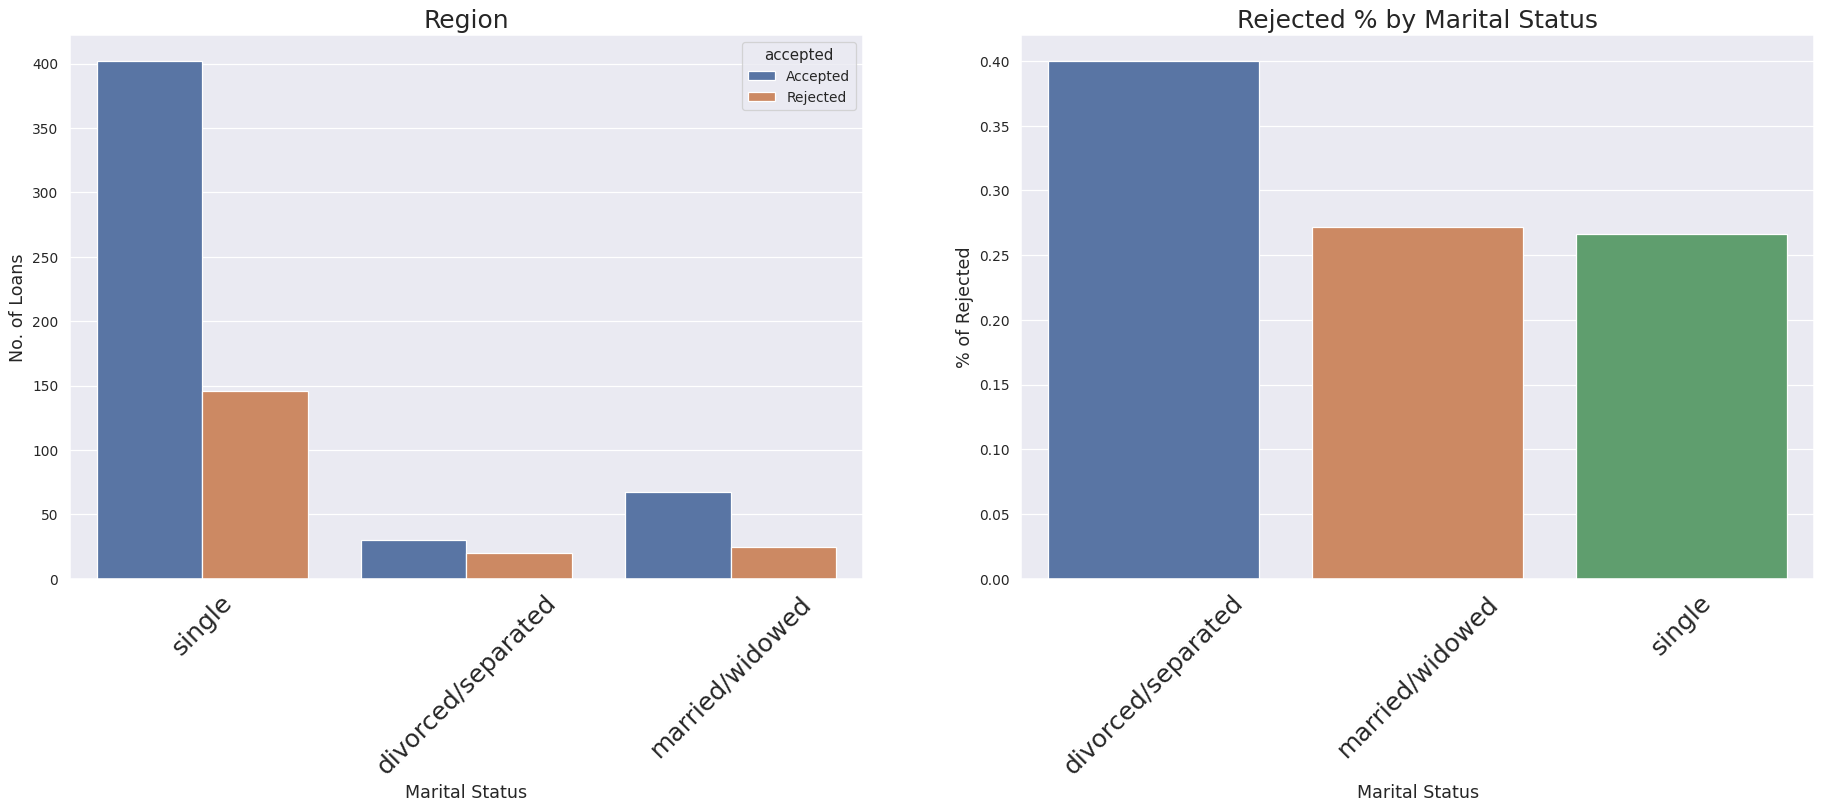

In [39]:
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(25,8), dpi=90)
sns.countplot('marital_status',hue='accepted',data=df[df['gender']=='male'],ax=ax1)
ax1.set_xlabel('Marital Status', fontsize=14)
ax1.set_ylabel('No. of Loans', fontsize=14)
ax1.set_title('Region', fontsize=20)
charge_off_rates = df[df['gender']=='male'].groupby('marital_status')['accepted'].value_counts(normalize=True).loc[:,'Rejected']
sns.barplot(x=charge_off_rates.index, y=charge_off_rates.values, ax=ax2)
ax2.set_xlabel('Marital Status', fontsize=14)
ax2.set_ylabel('% of Rejected', fontsize=14)
ax2.set_title('Rejected % by Marital Status', fontsize=20)
plt.sca(ax1)
plt.xticks(rotation=45, fontsize=20)
plt.sca(ax2)
plt.xticks(rotation=45, fontsize=20)

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

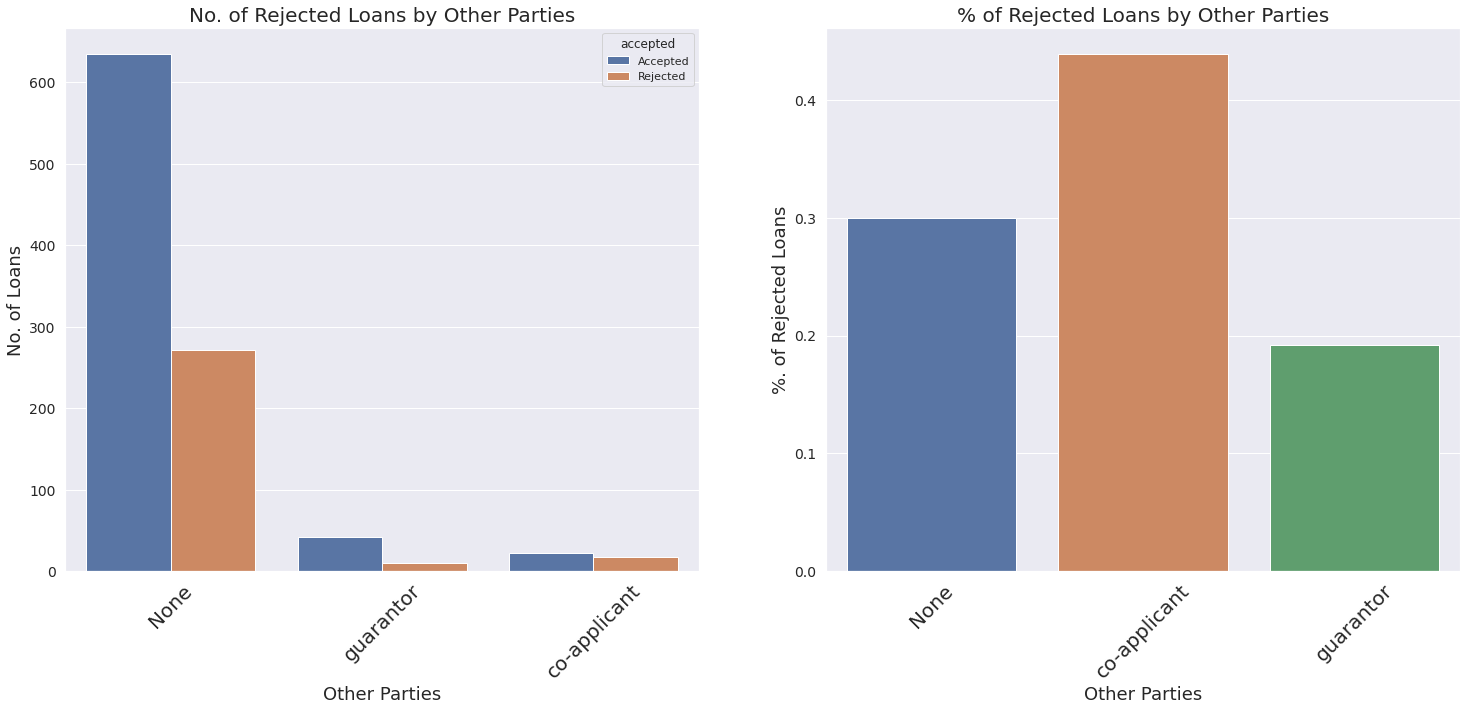

In [40]:
plt.figure(figsize=[25,10])
plt.subplot(1,2,1)
createCountPlot('other_parties', 'Other Parties', 'No. of Loans', 'No. of Rejected Loans by Other Parties')
plt.xticks(rotation=45, fontsize=20)

plt.subplot(1,2,2)
createPercPlot('other_parties', 'Other Parties', '%. of Rejected Loans', '% of Rejected Loans by Other Parties')
plt.xticks(rotation=45, fontsize=20)

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

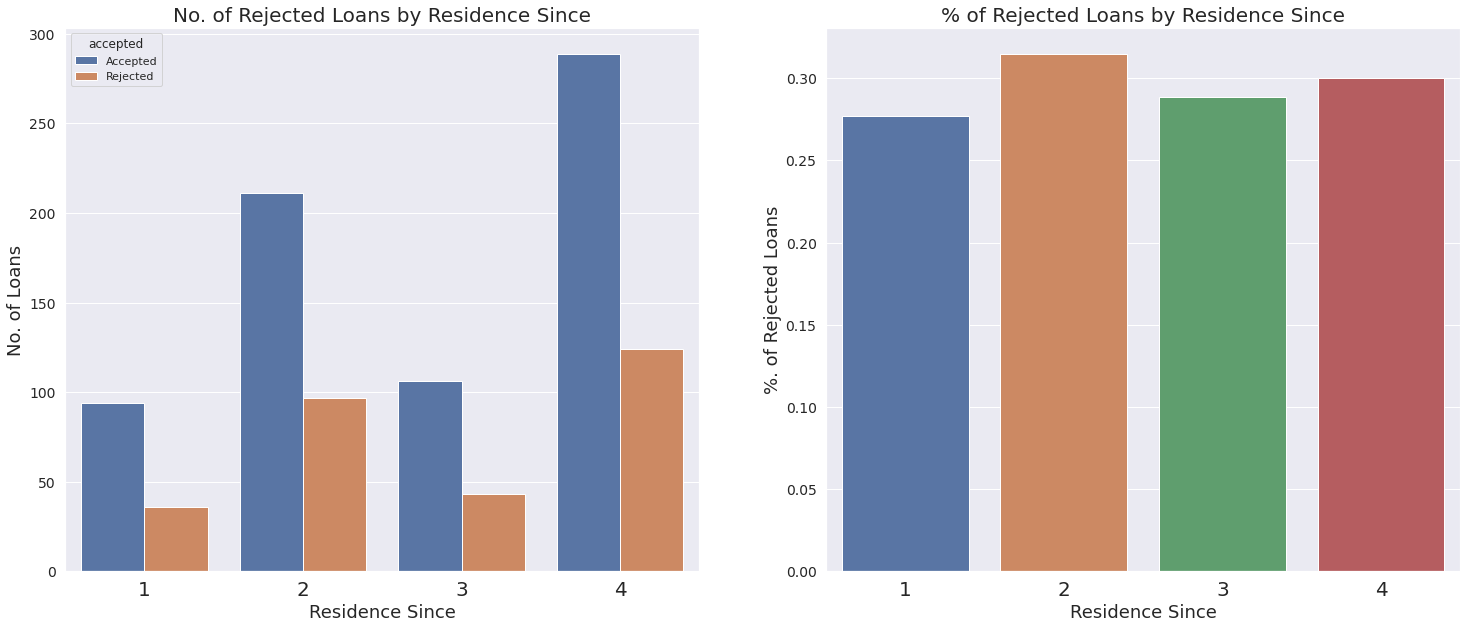

In [41]:
plt.figure(figsize=[25,10])
plt.subplot(1,2,1)
createCountPlot('residence_since', 'Residence Since', 'No. of Loans', 'No. of Rejected Loans by Residence Since')
plt.xticks(fontsize=20)

plt.subplot(1,2,2)
createPercPlot('residence_since', 'Residence Since', '%. of Rejected Loans', '% of Rejected Loans by Residence Since')
plt.xticks(fontsize=20)

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

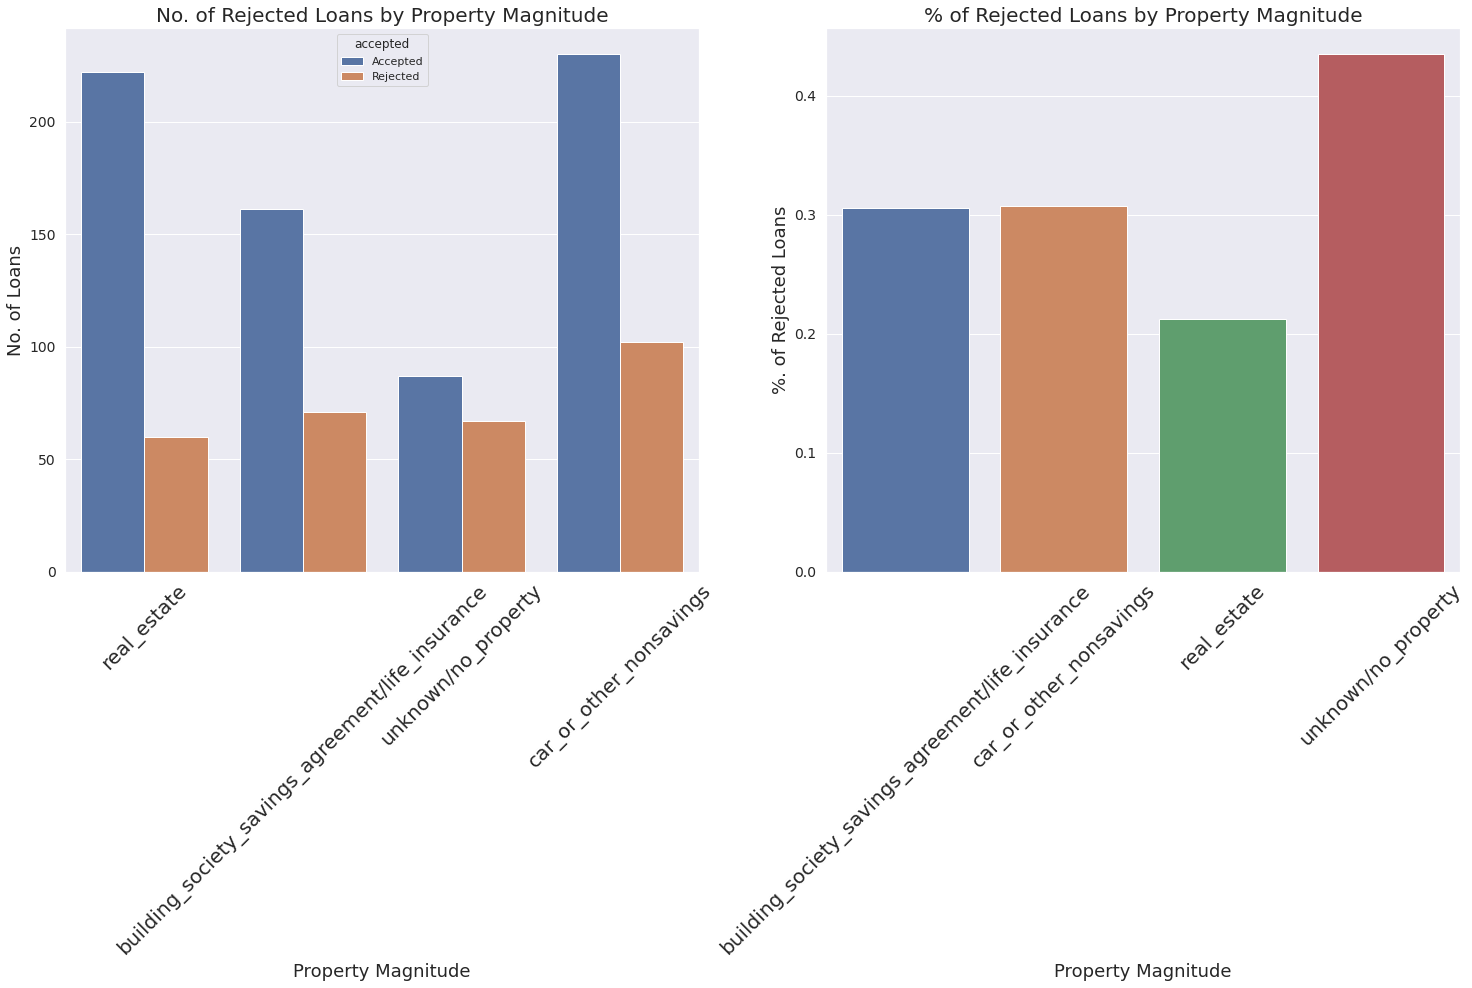

In [42]:
plt.figure(figsize=[25,10])
plt.subplot(1,2,1)
createCountPlot('property_magnitude', 'Property Magnitude', 'No. of Loans', 'No. of Rejected Loans by Property Magnitude')
plt.xticks(rotation=45, fontsize=20)

plt.subplot(1,2,2)
createPercPlot('property_magnitude', 'Property Magnitude', '%. of Rejected Loans', '% of Rejected Loans by Property Magnitude')
plt.xticks(rotation=45, fontsize=20)

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

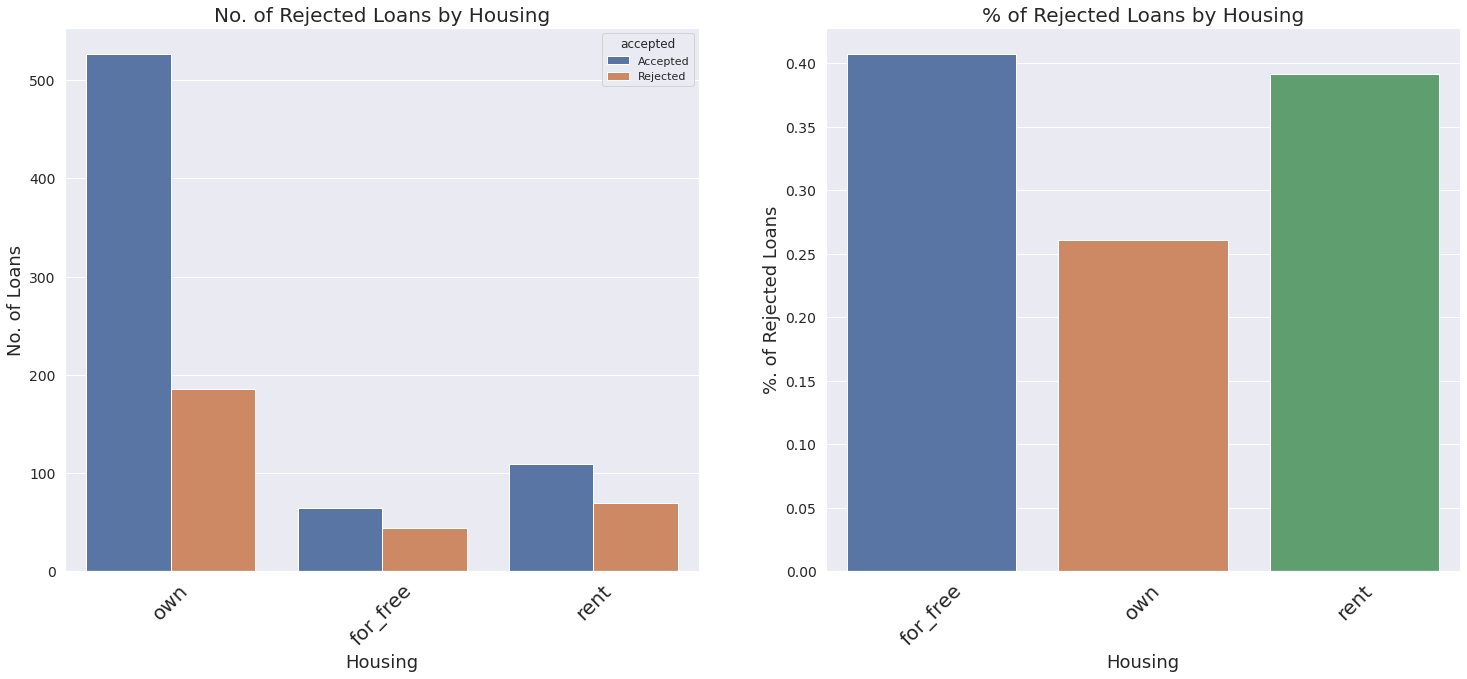

In [43]:
plt.figure(figsize=[25,10])
plt.subplot(1,2,1)
createCountPlot('housing', 'Housing', 'No. of Loans', 'No. of Rejected Loans by Housing')
plt.xticks(rotation=45, fontsize=20)

plt.subplot(1,2,2)
createPercPlot('housing', 'Housing', '%. of Rejected Loans', '% of Rejected Loans by Housing')
plt.xticks(rotation=45, fontsize=20)

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

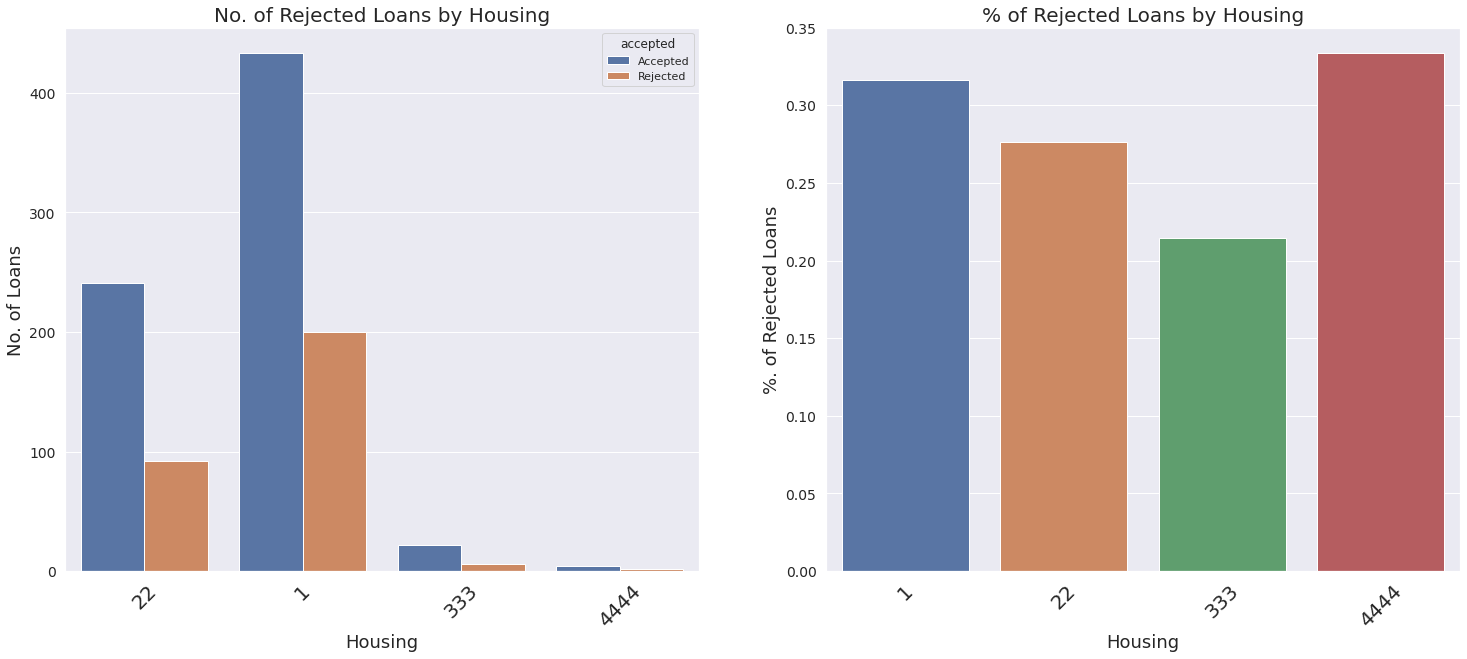

In [44]:
plt.figure(figsize=[25,10])
plt.subplot(1,2,1)
createCountPlot('existing_loans', 'Housing', 'No. of Loans', 'No. of Rejected Loans by Housing')
plt.xticks(rotation=45, fontsize=20)

plt.subplot(1,2,2)
createPercPlot('existing_loans', 'Housing', '%. of Rejected Loans', '% of Rejected Loans by Housing')
plt.xticks(rotation=45, fontsize=20)

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

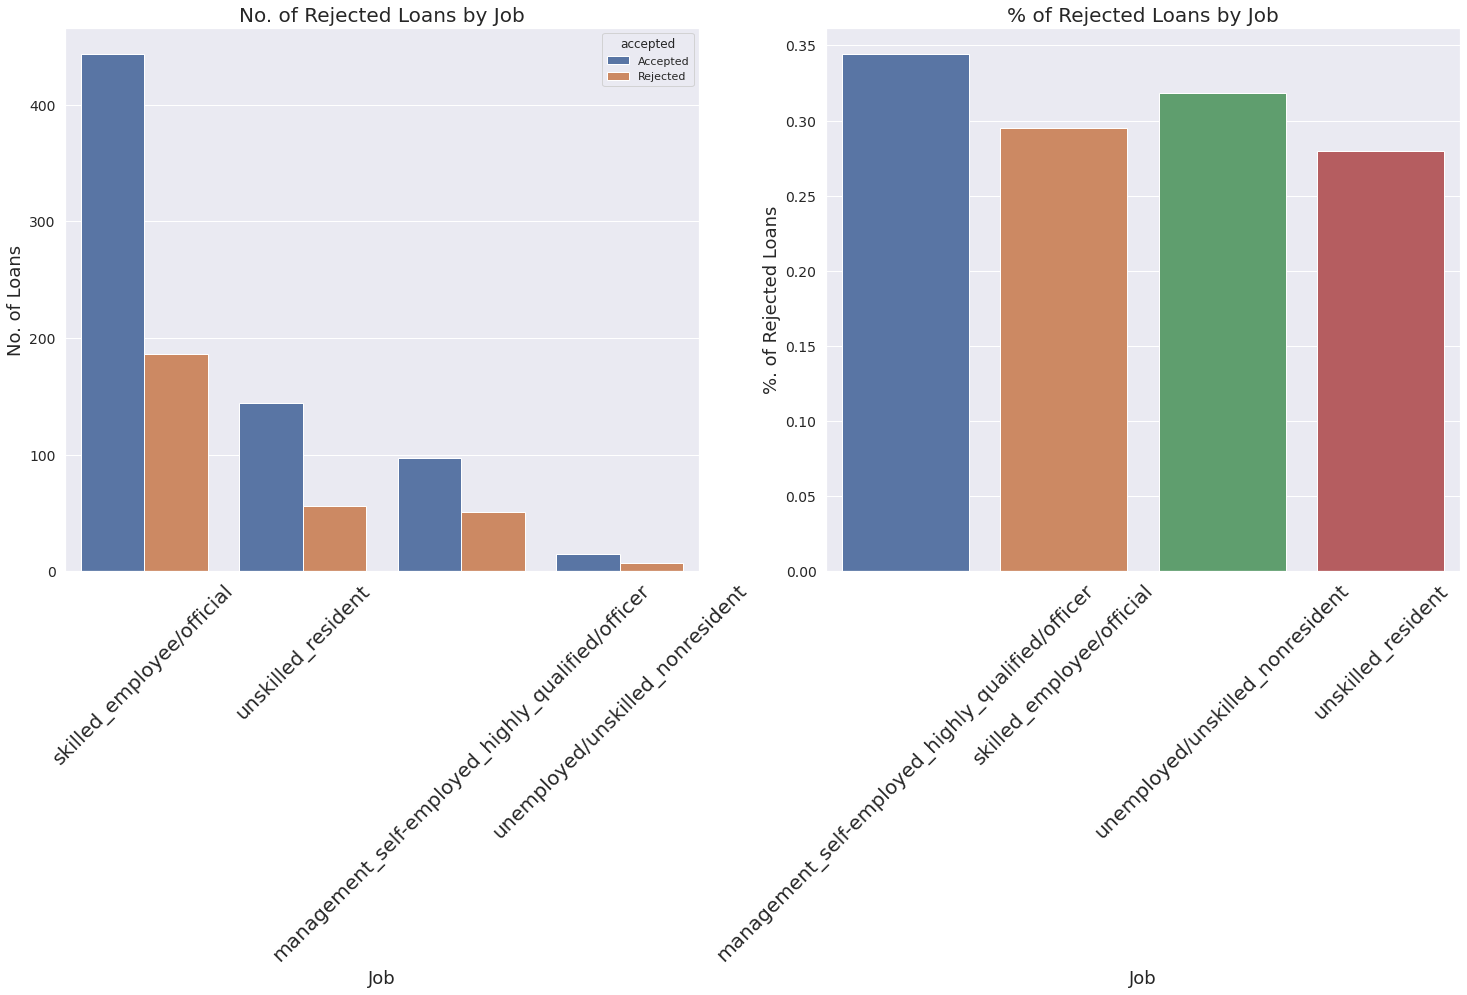

In [45]:
plt.figure(figsize=[25,10])
plt.subplot(1,2,1)
createCountPlot('job', 'Job', 'No. of Loans', 'No. of Rejected Loans by Job')
plt.xticks(rotation=45, fontsize=20)

plt.subplot(1,2,2)
createPercPlot('job', 'Job', '%. of Rejected Loans', '% of Rejected Loans by Job')
plt.xticks(rotation=45, fontsize=20)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

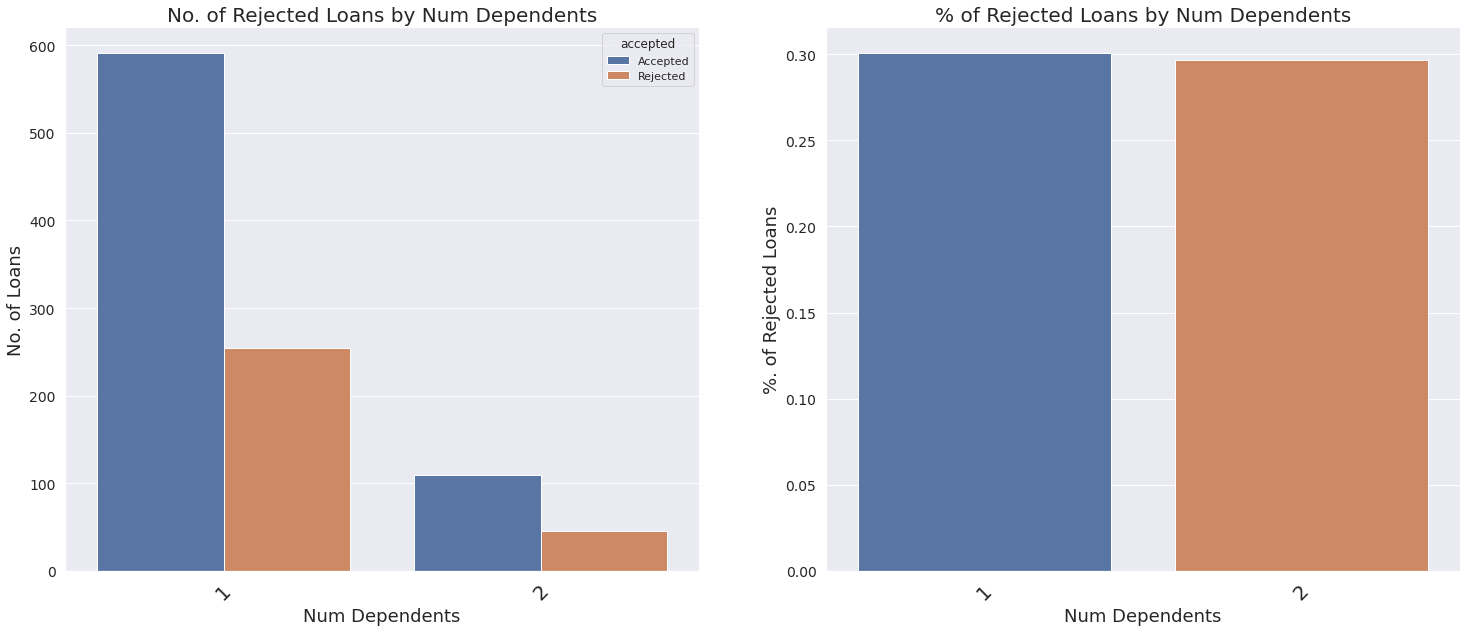

In [46]:
plt.figure(figsize=[25,10])
plt.subplot(1,2,1)
createCountPlot('num_dependents', 'Num Dependents', 'No. of Loans', 'No. of Rejected Loans by Num Dependents')
plt.xticks(rotation=45, fontsize=20)

plt.subplot(1,2,2)
createPercPlot('num_dependents', 'Num Dependents', '%. of Rejected Loans', '% of Rejected Loans by Num Dependents')
plt.xticks(rotation=45, fontsize=20)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

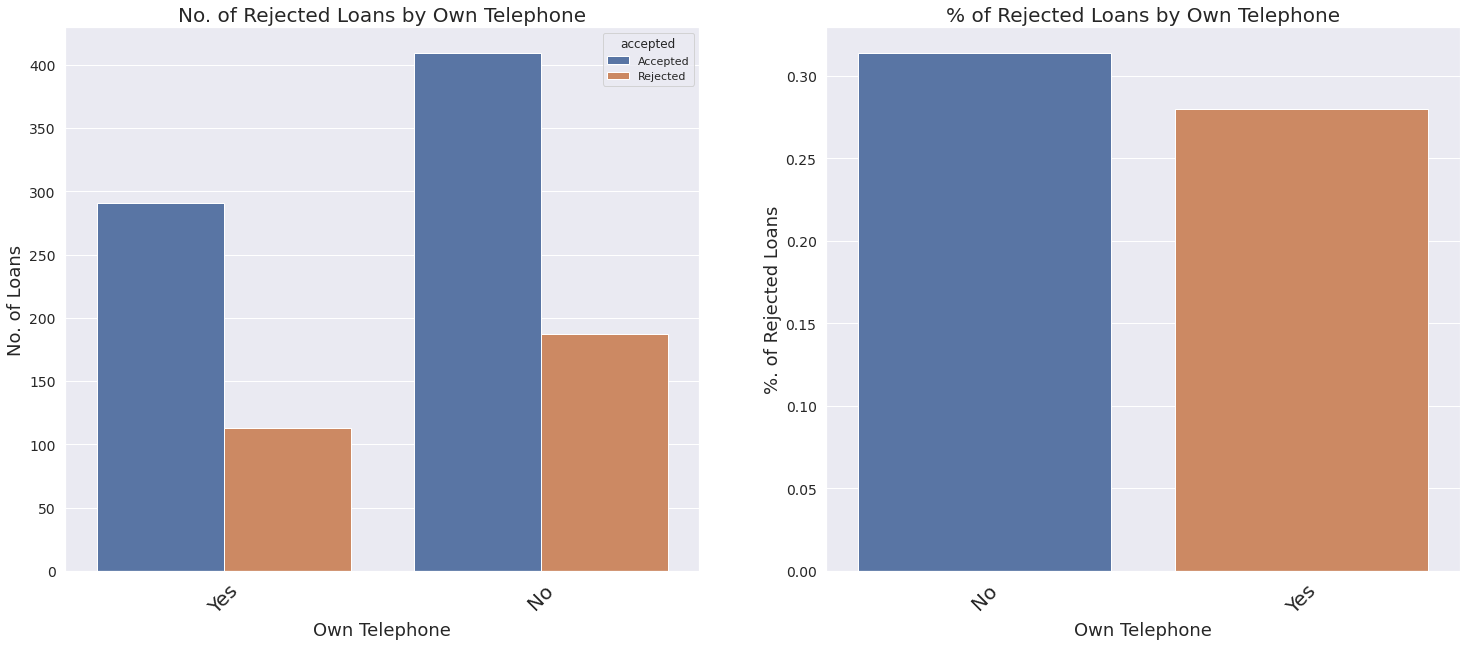

In [47]:
plt.figure(figsize=[25,10])
plt.subplot(1,2,1)
createCountPlot('own_telephone', 'Own Telephone', 'No. of Loans', 'No. of Rejected Loans by Own Telephone')
plt.xticks(rotation=45, fontsize=20)

plt.subplot(1,2,2)
createPercPlot('own_telephone', 'Own Telephone', '%. of Rejected Loans', '% of Rejected Loans by Own Telephone')
plt.xticks(rotation=45, fontsize=20)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

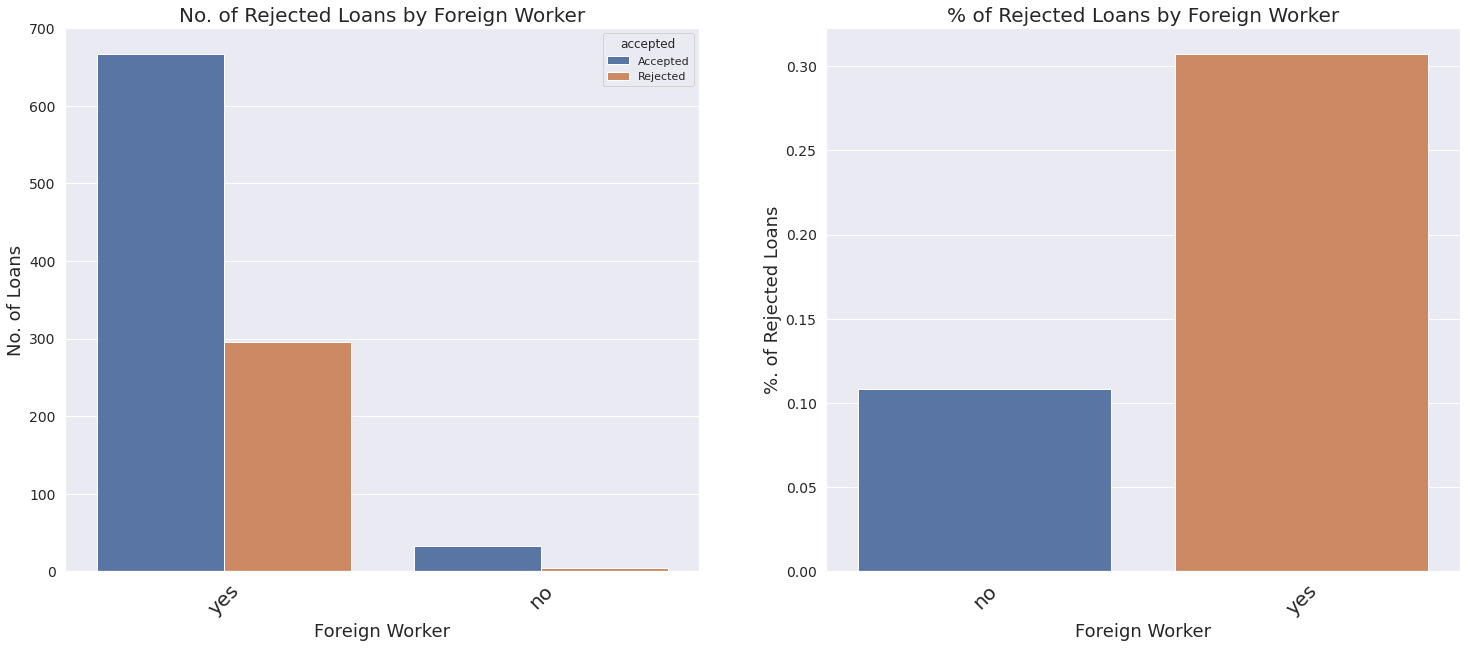

In [48]:
plt.figure(figsize=[25,10])
plt.subplot(1,2,1)
createCountPlot('foreign_worker', 'Foreign Worker', 'No. of Loans', 'No. of Rejected Loans by Foreign Worker')
plt.xticks(rotation=45, fontsize=20)

plt.subplot(1,2,2)
createPercPlot('foreign_worker', 'Foreign Worker', '%. of Rejected Loans', '% of Rejected Loans by Foreign Worker')
plt.xticks(rotation=45, fontsize=20)

### Bivariate analysis

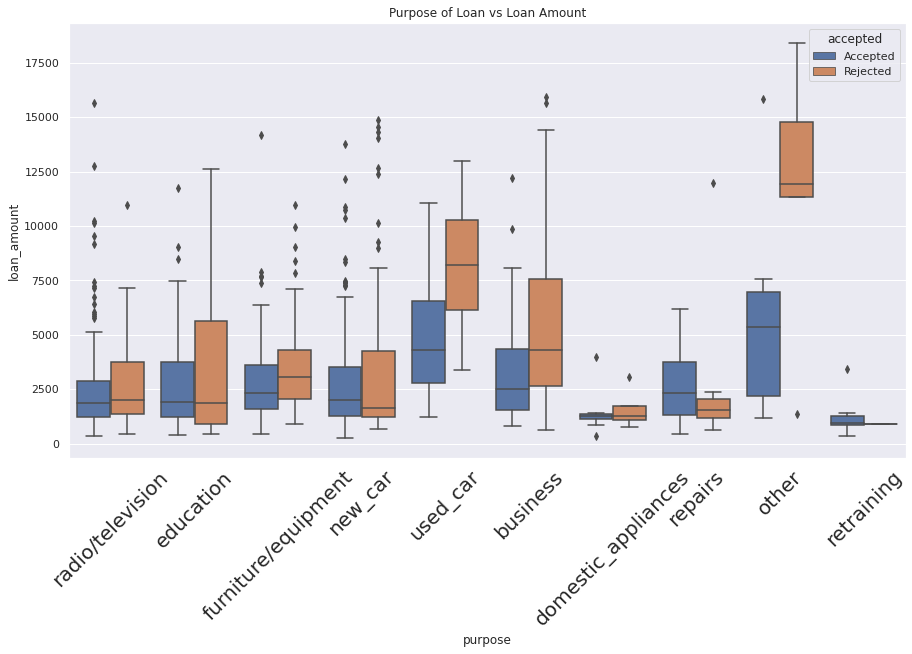

In [49]:
plt.figure(figsize=(15,8))
sns.boxplot(data =df, x='purpose', y='loan_amount', hue ='accepted')
plt.title('Purpose of Loan vs Loan Amount')
plt.xticks(rotation = 45, fontsize=20)
plt.show()

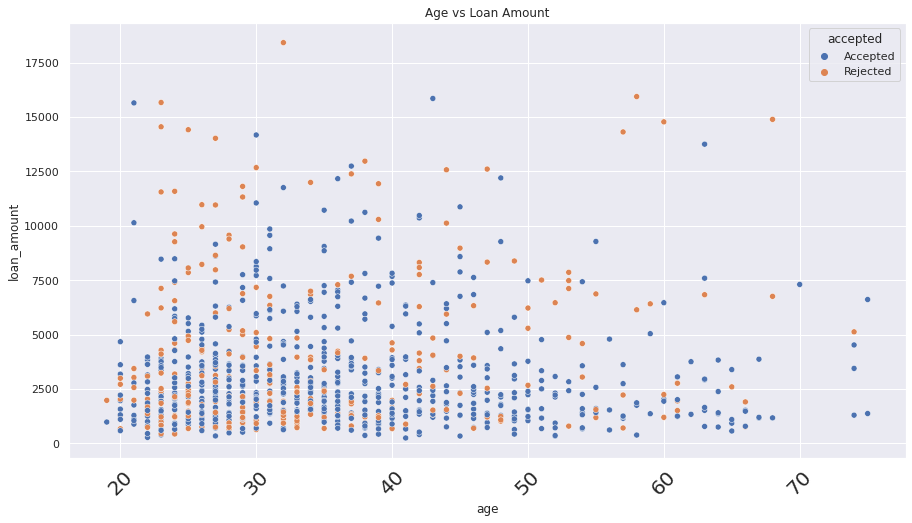

In [50]:

plt.figure(figsize=(15,8))
sns.scatterplot(x='age',y='loan_amount',hue='accepted',data=df)
plt.title('Age vs Loan Amount')
plt.xticks(rotation = 45, fontsize=20)
plt.show()

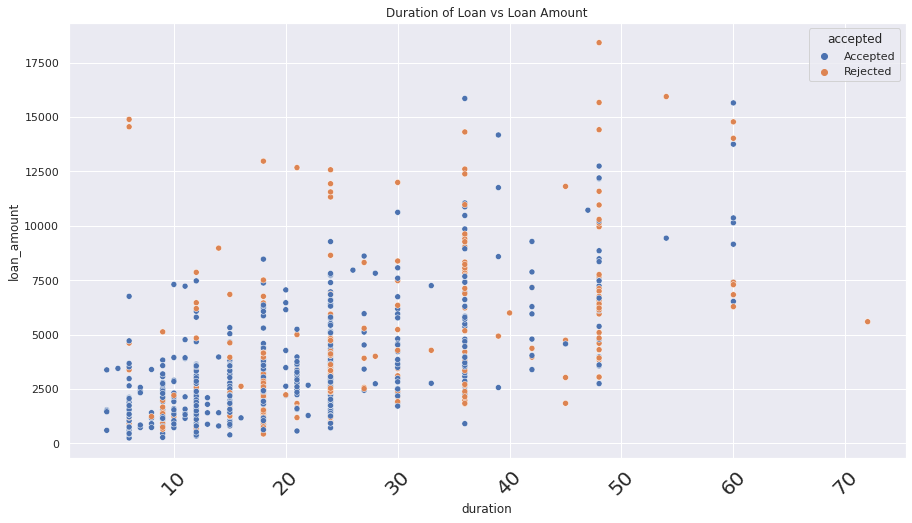

In [51]:

plt.figure(figsize=(15,8))
sns.scatterplot(x='duration',y='loan_amount',hue='accepted',data=df)
plt.title('Duration of Loan vs Loan Amount')
plt.xticks(rotation = 45, fontsize=20)
plt.show()

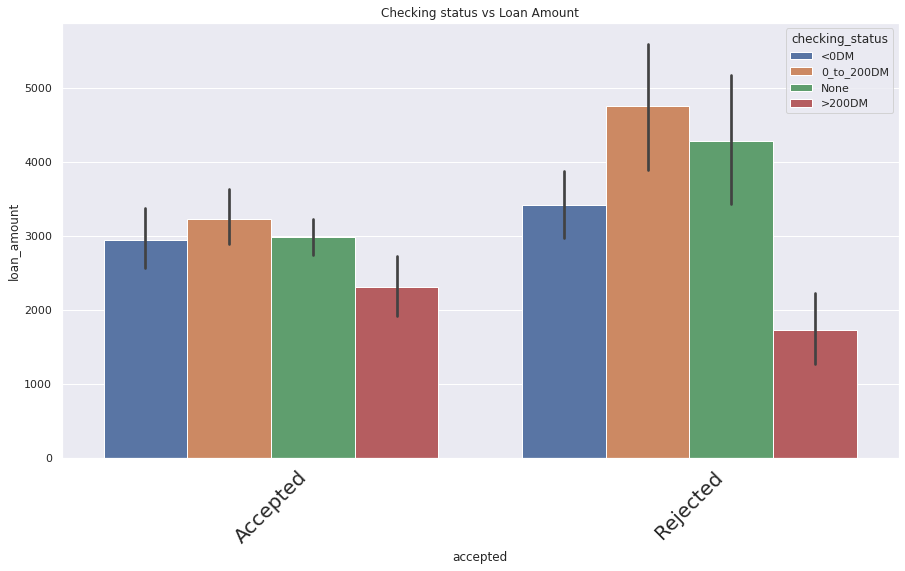

In [52]:

plt.figure(figsize=(15,8))
sns.barplot(x='accepted',y='loan_amount',hue='checking_status',data=df)
plt.title('Checking status vs Loan Amount')
plt.xticks(rotation = 45, fontsize=20)
plt.show()


<Figure size 1080x576 with 0 Axes>

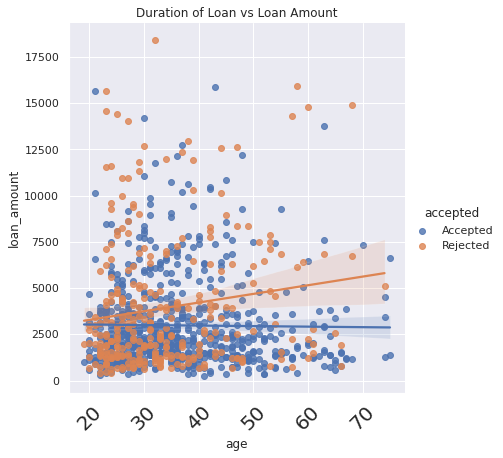

In [53]:
plt.figure(figsize=(15,8))
sns.lmplot(x='age',y='loan_amount',hue='accepted',data=df,height=6, aspect=1)
plt.title('Duration of Loan vs Loan Amount')
plt.xticks(rotation = 45, fontsize=20)
plt.show()

<Figure size 1080x576 with 0 Axes>

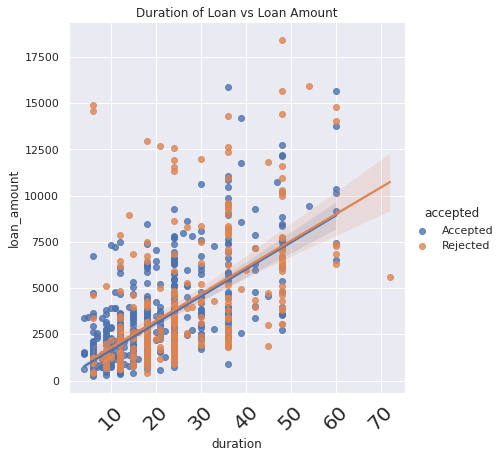

In [54]:
plt.figure(figsize=(15,8))
sns.lmplot(x='duration',y='loan_amount',hue='accepted',data=df,height=6, aspect=1)
plt.title('Duration of Loan vs Loan Amount')
plt.xticks(rotation = 45, fontsize=20)
plt.show()

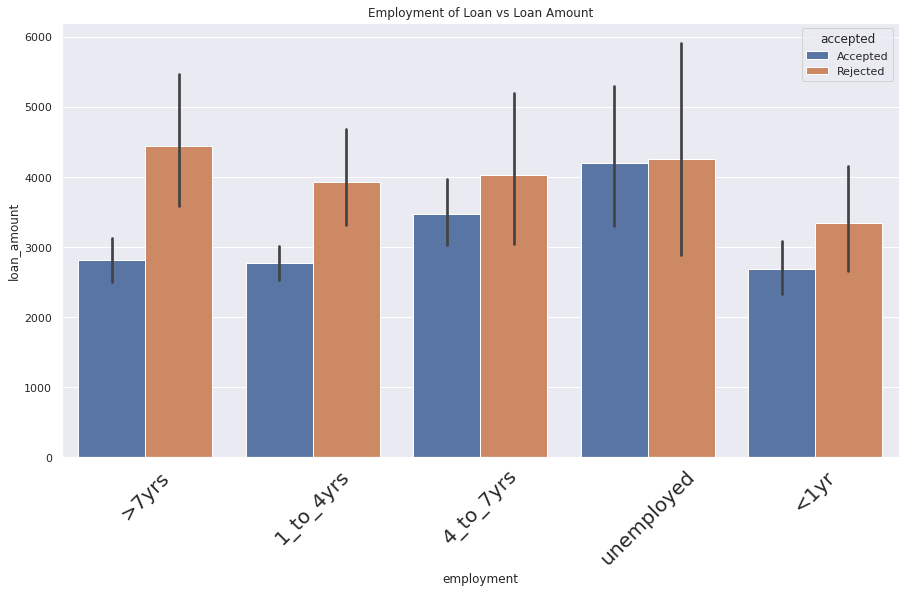

In [55]:

plt.figure(figsize=(15,8))
sns.barplot(x='employment',y='loan_amount',hue='accepted',data=df)
plt.title('Employment of Loan vs Loan Amount')
plt.xticks(rotation = 45, fontsize=20)
plt.show()


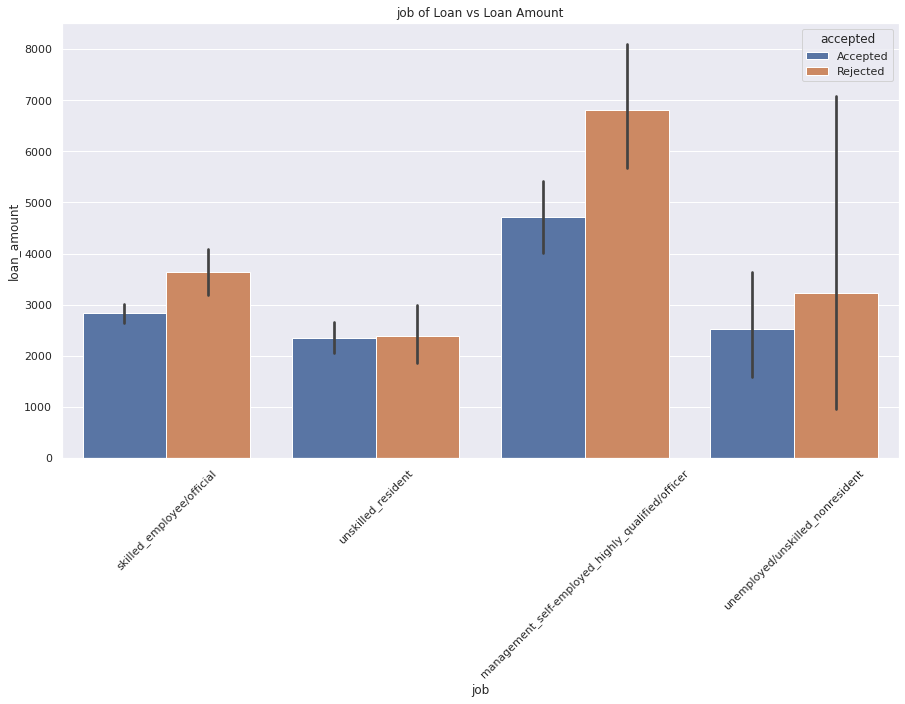

In [56]:

plt.figure(figsize=(15,8))
sns.barplot(x='job',y='loan_amount',hue='accepted',data=df)
plt.title('job of Loan vs Loan Amount')
plt.xticks(rotation = 45)
plt.show()


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

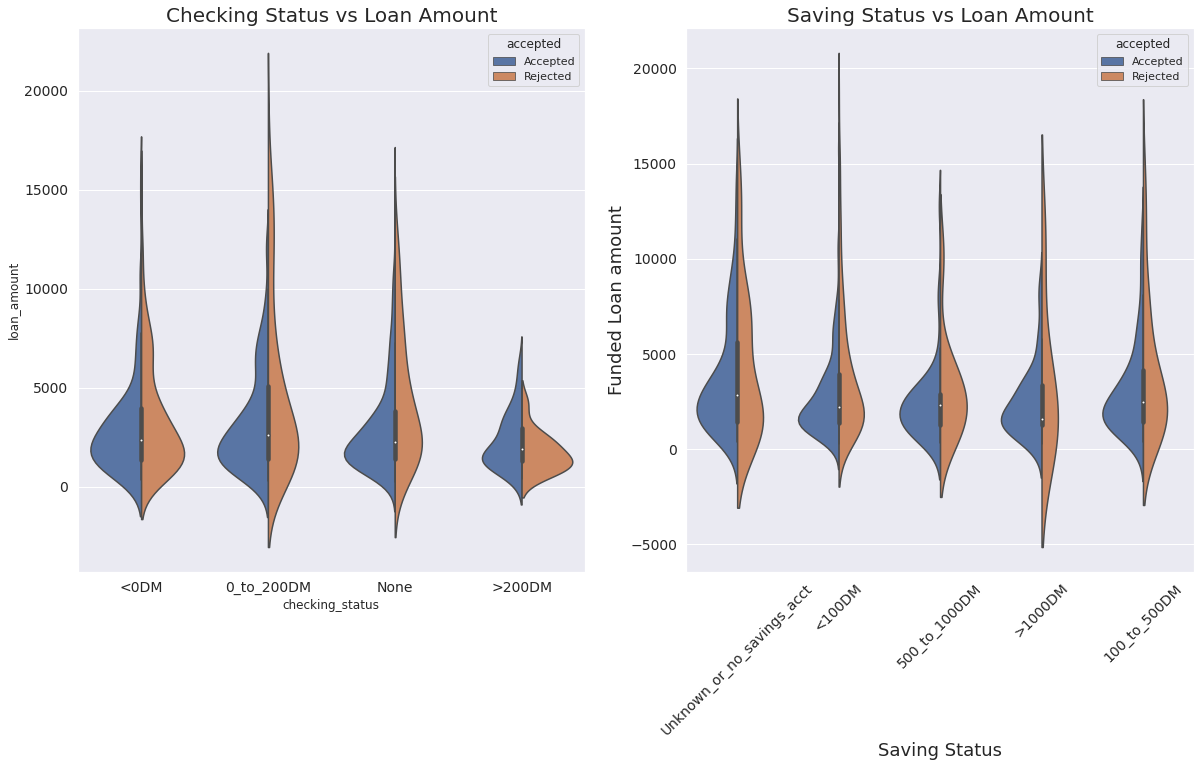

In [57]:
fig, (ax1, ax2)= plt.subplots(nrows=1, ncols=2, figsize=(20,10))
plot1 = sns.violinplot(x="checking_status", y="loan_amount", data=df, hue='accepted',split=True,ax=ax1 )
plot2 = sns.violinplot(x="savings_status", y="loan_amount", data=df, hue='accepted',split=True,ax=ax2 )
setLabels(plot1, 'Checking Status', 'Fun`bded Loan amount', 'Checking Status vs Loan Amount')
setLabels(plot2, 'Saving Status', 'Funded Loan amount', 'Saving Status vs Loan Amount')
plt.xticks(rotation = 45)

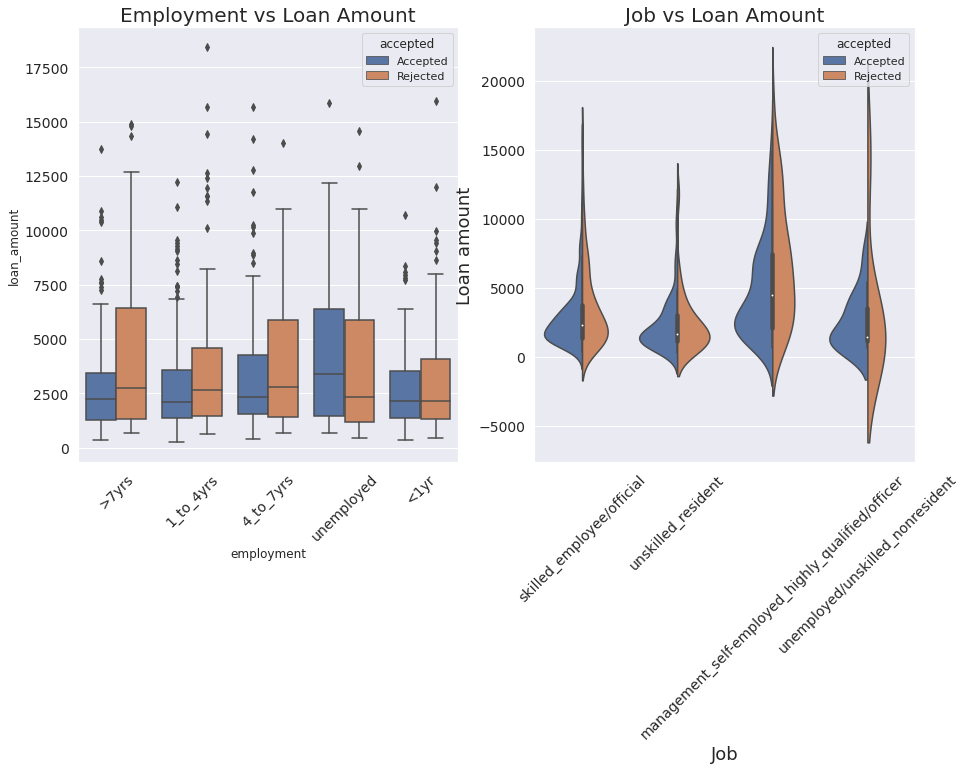

In [58]:
fig, (ax1,ax2)= plt.subplots(nrows=1, ncols=2, figsize=(15,8))
plot1 = sns.boxplot(data =df, x='employment', y='loan_amount', hue ='accepted',ax=ax1)

setLabels(plot1, 'Employment', 'Loan amount', 'Employment vs Loan Amount')
plt.sca(ax1)
plt.xticks(rotation=45, fontsize=14)
# plt.yticks(fontsize=14)

plot2 = sns.violinplot(x="job", y="loan_amount", data=df, hue='accepted',split=True,ax=ax2 )
plt.sca(ax2)
plt.xticks(rotation=45, fontsize =14)
# plt.yticks(fontsize=14)
setLabels(plot2, 'Job', 'Loan amount', 'Job vs Loan Amount')

### Modeling

In [59]:
df_model = df[['age','checking_status','duration','loan_amount','installment_commitment','accepted']]

In [60]:
df_model['accepted'] = df['accepted'].apply(lambda x: 0 if x=='Rejected' else 1)

In [61]:
checking_status_rates = pd.DataFrame(df_model['checking_status'].value_counts(normalize=True))

In [62]:
df_model = pd.merge(df_model,checking_status_rates,left_on='checking_status',right_on=checking_status_rates.index,how='left')

In [63]:
df_model.drop(['checking_status','checking_status_x'],axis=1,inplace=True)

In [64]:
df_model.rename({'checking_status_y':'checking_status'},axis=1,inplace=True)

In [65]:
df_model

,age,duration,loan_amount,installment_commitment,accepted,checking_status
0,67,6,1169,4,1,0.274
1,45,42,7882,2,1,0.274
2,53,24,4870,3,0,0.274
3,24,48,4308,3,0,0.274
4,60,24,1199,4,0,0.274
...,...,...,...,...,...,...
995,28,9,745,3,0,0.063
996,49,30,3656,4,1,0.063
997,57,24,1258,3,1,0.063
998,28,21,2923,1,1,0.063


In [66]:
df_model_correlation = df_model.select_dtypes(exclude=["object"]).corr()
df_model_correlation

,age,duration,loan_amount,installment_commitment,accepted,checking_status
age,1.000000,-0.036136,0.032716,0.058266,0.091127,0.022192
duration,-0.036136,1.000000,0.624984,0.074749,-0.214927,-0.000004
loan_amount,0.032716,0.624984,1.000000,-0.271316,-0.154739,0.029862
installment_commitment,0.058266,0.074749,-0.271316,1.000000,-0.072404,0.043081
accepted,0.091127,-0.214927,-0.154739,-0.072404,1.000000,0.196377
checking_status,0.022192,-0.000004,0.029862,0.043081,0.196377,1.000000


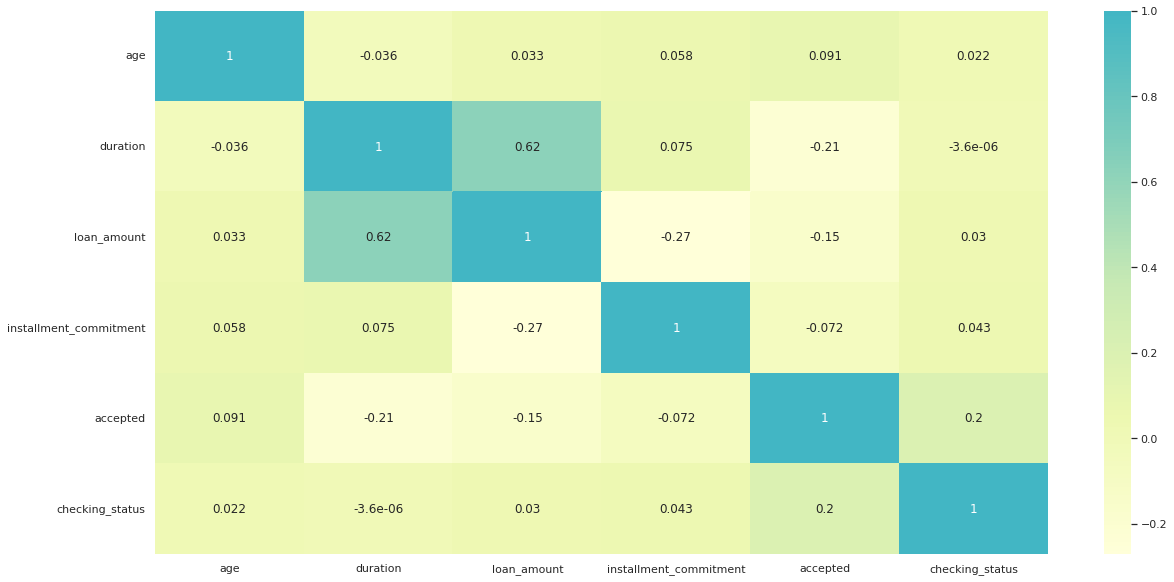

In [67]:
plt.figure(figsize=(20, 10))
cols = df_model.columns.values

sns.heatmap(df_model_correlation,xticklabels=cols,yticklabels=cols,annot= True,center=1,cmap="YlGnBu")


In [68]:
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.metrics import accuracy_score,auc, roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve, recall_score, precision_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

In [69]:
X = df_model.drop(['accepted'], axis = 1)
y = df_model['accepted']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 100, stratify=y)

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
rf = RandomForestClassifier(n_estimators=100,class_weight = 'balanced')
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print("Accuracy",accuracy_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred))
print("F1 score",f1_score(y_test, y_pred))

Accuracy 0.7566666666666667
Recall: 0.9
Precision: 0.7842323651452282
F1 score 0.8381374722838137


In [72]:
# Build GridSearchCV to find optimal hyperparameters
model = RandomForestClassifier(class_weight = "balanced", n_jobs = -1)
params = {'n_estimators':[50,100, 150, 250],
          'max_features':[0.3, 0.5, 0.7],
          'max_depth':[4, 6, 9]
          }
n_folds = StratifiedKFold(n_splits = 5, random_state = 100)
gridmodel = GridSearchCV(estimator = model,
                         param_grid = params,
                         cv = n_folds,
                         scoring = 'f1',
                         n_jobs = -1)

In [73]:
gridmodel.fit(x_train, y_train)

In [74]:
gridmodel.best_params_

AttributeError: ignored

In [ ]:
cv_results = pd.DataFrame(gridmodel.cv_results_)
cv_results

In [ ]:
cv_results[cv_results['rank_test_score']==1]['params'].values

In [ ]:
#### Build a random forest model with the best parameters

In [ ]:
rf = RandomForestClassifier(n_estimators=150,max_depth= 9, max_features= 0.3,class_weight = 'balanced')
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print("Accuracy",accuracy_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred))
print("F1 score",f1_score(y_test, y_pred))

In [ ]:
confusion = confusion_matrix(y_test, y_pred)
confusion

In [ ]:
precision

In [ ]:
#### After tuning the hyperparameters, model accuracy has significantly improved. As this is a class imbalance problem, decision threshold needs to be adjusted accordingly.

In [ ]:
y_test_prob = rf.predict_proba(x_test)
p, r, threshold = precision_recall_curve(y_test, y_test_prob[:,1])
plt.plot(threshold, p[:-1], "g--")
plt.plot(threshold, r[:-1], "r--")

In [ ]:
fpr, tpr, threshold = roc_curve(y_test, y_test_prob[:,1], pos_label=1)
plt.figure()
plt.plot(fpr, tpr, color='red',
         label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_AUC curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#### Observing the precision-recall curve, it appears that the ideal threshold for this data is around 0.2 to 0.4. Let's try that.

In [ ]:
thres_df = pd.DataFrame({'y_test':y_test, 'y_predicted_prob':y_test_prob[:,1]})
label_cols = ['y_label_45','y_label_48', 'y_label_50', 'y_label_55', 'y_label_60']
for enum, i in enumerate([0.45,0.48, 0.50, 0.55,0.60]):
    thres_df[label_cols[enum]] = thres_df['y_predicted_prob'].map(lambda x : 1 if (x > i) else 0)
thres_df.head()

In [ ]:
confusion = confusion_matrix(thres_df.y_test, thres_df.y_label_45)
print(confusion)
precision = round((confusion[1,1]/(confusion[1,1]+confusion[0,1])),2)
recall = round((confusion[1,1]/(confusion[1,1]+confusion[1,0])),2)
specificity = round((confusion[0,0]/(confusion[0,0]+confusion[0,1])),2)
f1=2*((precision*recall)/(precision+recall))
print(recall)
print(specificity)
print(f1)

In [ ]:
confusion = confusion_matrix(thres_df.y_test, thres_df.y_label_50)
print(confusion)
precision = round((confusion[1,1]/(confusion[1,1]+confusion[0,1])),2)
recall = round((confusion[1,1]/(confusion[1,1]+confusion[1,0])),2)
specificity = round((confusion[0,0]/(confusion[0,0]+confusion[0,1])),2)
f1=2*((precision*recall)/(precision+recall))
print(recall)
print(specificity)
print(f1)

In [ ]:
confusion = confusion_matrix(thres_df.y_test, thres_df.y_label_55)
print(confusion)
precision = round((confusion[1,1]/(confusion[1,1]+confusion[0,1])),2)
recall = round((confusion[1,1]/(confusion[1,1]+confusion[1,0])),2)
specificity = round((confusion[0,0]/(confusion[0,0]+confusion[0,1])),2)
f1=2*((precision*recall)/(precision+recall))
print(recall)
print(specificity)
print(f1)

In [ ]:
confusion = confusion_matrix(thres_df.y_test, thres_df.y_label_60)
print(confusion)
precision = round((confusion[1,1]/(confusion[1,1]+confusion[0,1])),2)
recall = round((confusion[1,1]/(confusion[1,1]+confusion[1,0])),2)
specificity = round((confusion[0,0]/(confusion[0,0]+confusion[0,1])),2)
f1=2*((precision*recall)/(precision+recall))
print(recall)
print(specificity)
print(f1)

In [75]:
from pycaret.utils import enable_colab 

In [76]:
enable_colab()

Colab mode enabled.


In [77]:
from pycaret.classification import *

In [ ]:
df_model

In [78]:
experiment = setup(df_model, target='accepted')

,Description,Value
0,session_id,5172
1,Target,accepted
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(1000, 6)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


In [79]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7381,0.7290,0.8609,0.7869,0.8211,0.3322,0.3403,0.506
lightgbm,Light Gradient Boosting Machine,0.7381,0.7267,0.8464,0.7939,0.8186,0.3463,0.3507,0.096
gbc,Gradient Boosting Classifier,0.7353,0.7366,0.8833,0.7718,0.8234,0.3026,0.3165,0.110
ada,Ada Boost Classifier,0.7296,0.7224,0.8814,0.7678,0.8202,0.2839,0.2966,0.106
lr,Logistic Regression,0.7125,0.6361,0.9653,0.7195,0.8243,0.1155,0.1838,0.329
et,Extra Trees Classifier,0.7095,0.7094,0.8323,0.7725,0.8000,0.2681,0.2742,0.465
nb,Naive Bayes,0.7039,0.6733,0.9020,0.7351,0.8094,0.1710,0.2014,0.016
lda,Linear Discriminant Analysis,0.6952,0.7008,0.9120,0.7236,0.8068,0.1260,0.1543,0.017
ridge,Ridge Classifier,0.6909,0.0000,0.9284,0.7145,0.8073,0.0857,0.1251,0.014
dt,Decision Tree Classifier,0.6867,0.6267,0.7771,0.7790,0.7751,0.2500,0.2548,0.016


In [85]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6857,0.6122,0.7959,0.7647,0.7800,0.2308,0.2313
1,0.6286,0.6122,0.6531,0.7805,0.7111,0.2025,0.2088
2,0.6857,0.6395,0.7551,0.7872,0.7708,0.2715,0.2721
3,0.7286,0.7109,0.7551,0.8409,0.7957,0.3949,0.4000
4,0.6714,0.6701,0.6735,0.8250,0.7416,0.3030,0.3150
5,0.7000,0.5816,0.8776,0.7414,0.8037,0.1860,0.1985
6,0.6286,0.5034,0.8163,0.7018,0.7547,0.0076,0.0080
7,0.7714,0.6871,0.8980,0.8000,0.8462,0.4074,0.4179
8,0.6429,0.5680,0.7551,0.7400,0.7475,0.1379,0.1380
9,0.7246,0.6815,0.7917,0.8085,0.8000,0.3583,0.3585


In [80]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8143,0.7998,0.8980,0.8462,0.8713,0.5390,0.5421
1,0.6857,0.6487,0.7959,0.7647,0.7800,0.2308,0.2313
2,0.7143,0.7177,0.9184,0.7377,0.8182,0.1870,0.2142
3,0.8000,0.8017,0.8776,0.8431,0.8600,0.5105,0.5117
4,0.7000,0.7245,0.7551,0.8043,0.7789,0.3137,0.3152
5,0.7143,0.6113,0.8571,0.7636,0.8077,0.2593,0.2659
6,0.7000,0.6283,0.8571,0.7500,0.8000,0.2105,0.2182
7,0.8000,0.8338,0.9388,0.8070,0.8679,0.4656,0.4890
8,0.7714,0.7677,0.8776,0.8113,0.8431,0.4245,0.4289
9,0.6812,0.7569,0.8333,0.7407,0.7843,0.1812,0.1859


In [81]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7857,0.8503,1.0000,0.7656,0.8673,0.3590,0.4677
1,0.6429,0.6327,0.8776,0.6935,0.7748,-0.0331,-0.0392
2,0.7286,0.7182,1.0000,0.7206,0.8376,0.1284,0.2620
3,0.7429,0.8290,0.9592,0.7460,0.8393,0.2437,0.3013
4,0.7286,0.8027,1.0000,0.7206,0.8376,0.1284,0.2620
5,0.6714,0.6195,0.9592,0.6912,0.8034,-0.0550,-0.1123
6,0.6857,0.7119,0.9592,0.7015,0.8103,0.0090,0.0154
7,0.7143,0.8110,0.9796,0.7164,0.8276,0.0991,0.1693
8,0.7571,0.7949,0.9796,0.7500,0.8496,0.2735,0.3563
9,0.7246,0.7574,0.9792,0.7231,0.8319,0.1580,0.2403


In [82]:
tuned_rf = tune_model(rf,optimize='F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7857,0.8503,1.0000,0.7656,0.8673,0.3590,0.4677
1,0.6429,0.6327,0.8776,0.6935,0.7748,-0.0331,-0.0392
2,0.7286,0.7182,1.0000,0.7206,0.8376,0.1284,0.2620
3,0.7429,0.8290,0.9592,0.7460,0.8393,0.2437,0.3013
4,0.7286,0.8027,1.0000,0.7206,0.8376,0.1284,0.2620
5,0.6714,0.6195,0.9592,0.6912,0.8034,-0.0550,-0.1123
6,0.6857,0.7119,0.9592,0.7015,0.8103,0.0090,0.0154
7,0.7143,0.8110,0.9796,0.7164,0.8276,0.0991,0.1693
8,0.7571,0.7949,0.9796,0.7500,0.8496,0.2735,0.3563
9,0.7246,0.7574,0.9792,0.7231,0.8319,0.1580,0.2403


In [91]:
tuned_rf.base_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [90]:
tuned_rf.n_estimators

300

In [ ]:
feature_imp_r = pd.DataFrame({'Columns':x_train.columns, 'Importance':tuned_rf.feature_importances_})
feature_imp_r.sort_values(by = 'Importance', ascending = False, inplace = True)      
feature_imp_r.head()

In [97]:
tuned_rf.

8